In [1]:
import pandas as pd
import numpy as np
import sys
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, f1_score, silhouette_samples, silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
import sklearn
import statsmodels
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import copy
import requests
import pprint
import xgboost
import scipy
import warnings
import re
import joblib
from datetime import datetime
from scipy import stats
# from urllib import parse
# from bs4 import BeautifulSoup

# ÏßÄÏàò ÌòïÌÉúÏùò Ïã§ÏàòÎ•º ÏÜåÏàòÏ†ê 3ÏûêÎ¶¨ÍπåÏßÄ ÌëúÍ∏∞
pd.options.display.float_format = "{:.3f}".format

# Í≥µÏú† Ìè¥Îçî Í≤ΩÎ°ú
dirShare = ".."

# Í≤ΩÍ≥† Ï∂úÎ†• Î¨¥Ïãú
warnings.filterwarnings("ignore")

In [2]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†Ñ ÌôïÏù∏
print("Python ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + sys.version)
print("pandas ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + pd.__version__)
print("Numpy ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + np.__version__)
print("scikit-learn ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + sklearn.__version__)
print("scipy ÌòÑÏû¨ Î≤ÑÏ†Ñ : "+ scipy.__version__)
print("statsmodels ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + statsmodels.__version__)
print("xgboost ÌòÑÏû¨ Î≤ÑÏ†Ñ : " + xgboost.__version__)

Python ÌòÑÏû¨ Î≤ÑÏ†Ñ : 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
pandas ÌòÑÏû¨ Î≤ÑÏ†Ñ : 2.0.3
Numpy ÌòÑÏû¨ Î≤ÑÏ†Ñ : 1.24.3
scikit-learn ÌòÑÏû¨ Î≤ÑÏ†Ñ : 1.3.0
scipy ÌòÑÏû¨ Î≤ÑÏ†Ñ : 1.11.1
statsmodels ÌòÑÏû¨ Î≤ÑÏ†Ñ : 0.14.0
xgboost ÌòÑÏû¨ Î≤ÑÏ†Ñ : 1.7.6


# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í≥† Ï†ÑÏ≤òÎ¶¨

## Í∏∞Î≥∏Ï†ÑÏ≤òÎ¶¨

In [3]:
# train.csv Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏúºÎ°ú Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(dirShare+"/data/train.csv")

# # df Ï†ïÎ≥¥ ÌôïÏù∏
# df.info()

# # df ÏÉÅÏúÑ 10Í∞ú Î∂àÎü¨Ïò§Í∏∞
# df.head(10)

In [4]:
df_t = pd.read_csv(dirShare+"/data/test.csv")

# df_t.info()
# df_t.head()

In [5]:
# Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏ÌïòÍ∏∞
print("train Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : ", df.shape[0])
print("test Îç∞Ïù¥ÌÑ∞ Í∞úÏàò : ", df_t.shape[0])

# len(df)Î•º Ïç®ÎèÑ ÎèôÏùº

train Îç∞Ïù¥ÌÑ∞ Í∞úÏàò :  301
test Îç∞Ïù¥ÌÑ∞ Í∞úÏàò :  127


In [6]:
# Ïà´Ïûê ÌòïÏãùÏùò Ïª¨ÎüºÏùò Í∏∞Ïà†ÌÜµÍ≥ÑÍ∞íÏùÑ Ï∂úÎ†•, train.csv
df.describe()

inst_id     sgg     openDate  bedCount         revenue1  \
count  301.000 301.000      301.000   296.000          293.000   
mean   219.056  81.040 20050125.801   145.709  12881747447.993   
std    121.235  50.970    88938.154   118.924  20435433475.616   
min      1.000   1.000 19780124.000     0.000            0.000   
25%    112.000  37.000 20011017.000    52.750   3252111902.000   
50%    230.000  75.000 20071126.000   136.500   5524218104.000   
75%    321.000 123.000 20111021.000   193.000  12748392940.000   
max    428.000 178.000 20170607.000   656.000 151000000000.000   

           salescost1             sga1         salary1           noi1  \
count         293.000          293.000         293.000        293.000   
mean   2014902794.594  10332439064.089  5654114566.904  269615124.573   
std    7460270656.568  14938862491.946  8083342530.256  802370115.514   
min             0.000            0.000           0.000          0.000   
25%             0.000   2758200772.000  1626052720.000    8217133.000   
50%     210410492.000   4684074465.000  2659892367.000   43637641.000   
75%     910527771.000  10778762060.000  6363400069.000  205033071.000   
max   98503322990.000 103000000000.000 64035593950.000 9144170639.000   

                noe1  ...  receivableL2           debt2  liquidLiabilities2  \
count        293.000  ...       293.000         293.000             293.000   
mean   511587022.570  ...    222670.000  8146026488.788      3860583593.406   
std   1060379255.452  ...   3811496.447 12557995349.365      6797242094.076   
min            0.000  ...         0.000           0.000               0.000   
25%     80133952.000  ...         0.000  1283220350.000       285574118.000   
50%    183196506.000  ...         0.000  3784552900.000      1454049945.000   
75%    420333030.000  ...         0.000  8465053127.000      4364713622.000   
max   8686379500.000  ...  65242310.000 85088583901.000     68468775764.000   

           shortLoan2  NCLiabilities2       longLoan2        netAsset2  \
count         293.000         293.000         293.000          293.000   
mean   1510050431.986  4471247363.877  2709978815.423   5273919018.089   
std    2953412250.368  7659580436.397  4564001070.999  10812593821.248   
min             0.000           0.000           0.000 -20147802018.000   
25%             0.000    25578782.000           0.000   1017572570.000   
50%      85425488.000  1969746813.000  1100000000.000   2894969804.000   
75%    1567966980.000  4905441439.000  3360000000.000   5370284792.000   
max   17593752360.000 51503883627.000 32561472110.000 125000000000.000   

             surplus2  employee1  employee2  
count         293.000    291.000    288.000  
mean    978627865.256    142.546    134.326  
std    4688797890.975    160.191    151.062  
min   -2781506722.000      0.000      0.000  
25%             0.000     53.500     53.750  
50%             0.000     80.000     79.000  
75%     101444685.000    181.500    170.000  
max   68527297093.000   1200.000   1200.000  

[8 rows x 54 columns]

In [7]:
# Ïà´Ïûê ÌòïÏãùÏùò Ïª¨ÎüºÏùò Í∏∞Ïà†ÌÜµÍ≥ÑÍ∞íÏùÑ Ï∂úÎ†•, test.csv
df_t.describe()

inst_id    OC     sgg     openDate  bedCount         revenue1  \
count  127.000 0.000 127.000      126.000   119.000          125.000   
mean   205.906   NaN  95.858 20050851.333   172.790  18244463620.632   
std    131.802   NaN  52.684    87958.149   126.024  31335295156.854   
min      2.000   NaN   6.000 19760409.000     0.000            0.000   
25%     89.000   NaN  51.000 20000826.000    94.000   3235888530.000   
50%    199.000   NaN  95.000 20071066.000   156.000   6637115540.000   
75%    328.000   NaN 144.500 20117895.500   213.000  17040391156.000   
max    431.000   NaN 177.000 20170531.000   771.000 181000000000.000   

            salescost1             sga1         salary1           noi1  ...  \
count          125.000          125.000         125.000        125.000  ...   
mean    3973320516.568  13404099537.944  7415083961.448  517551263.832  ...   
std    14199483023.803  20544811391.822 12100434017.387 1193138608.474  ...   
min              0.000            0.000           0.000          0.000  ...   
25%              0.000   3083860292.000  1666742310.000   16410940.000  ...   
50%      189692304.000   5716501623.000  3263054070.000   53191709.000  ...   
75%     1192329214.000  14452425786.000  7198103374.000  371459225.000  ...   
max   116000000000.000 127000000000.000 82395611833.000 7302719335.000  ...   

             tanAsset2    OnonCAsset2  receivableL2            debt2  \
count          125.000        125.000       125.000          125.000   
mean   13362088426.024  351383068.584     19731.144  11898512213.344   
std    20854039250.721  979109688.084    220600.896  19711820111.028   
min              0.000          0.000         0.000            0.000   
25%     2807762809.000          0.000         0.000   1679896491.000   
50%     5450482767.000   33173766.000         0.000   4494217146.000   
75%    11871143997.000  204899800.000         0.000  14120305387.000   
max   113000000000.000 7112779552.000   2466393.000 131000000000.000   

       liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
count             125.000         125.000         125.000         125.000   
mean       5633432084.136  2181713388.144  6495025895.904  4482682424.408   
std        9662047510.141  4952448637.736 12036733189.767  7517020054.736   
min                 0.000           0.000           0.000           0.000   
25%         391415567.000           0.000   132136760.000           0.000   
50%        1554505639.000   300000000.000  2030000000.000  1750000000.000   
75%        6586241453.000  2650000000.000  5700000000.000  4857047850.000   
max       52414267533.000 37143344381.000 78556538604.000 36202877976.000   

            netAsset2        surplus2  
count         125.000         125.000  
mean   6116178748.752  1648473877.648  
std    9813461143.417  4779443752.861  
min   -2955957091.000 -8600000000.000  
25%     949265633.000           0.000  
50%    2427138957.000           0.000  
75%    5881964991.000   693516549.000  
max   49244922328.000 25617866194.000  

[8 rows x 53 columns]

In [8]:
# Ïª¨ÎüºÎ≥Ñ null Í∞í ÌôïÏù∏ÌïòÍ∏∞, train.csv
df.shape[0] - df.count()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


In [9]:
# Ïª¨ÎüºÎ≥Ñ null Í∞í ÌôïÏù∏ÌïòÍ∏∞, test.csv
df_t.shape[0] - df_t.count()

inst_id                 0
OC                    127
sido                    0
sgg                     0
openDate                1
bedCount                8
instkind                2
revenue1                2
salescost1              2
sga1                    2
salary1                 2
noi1                    2
noe1                    2
interest1               2
ctax1                   2
profit1                 2
liquidAsset1            2
quickAsset1             2
receivableS1            2
inventoryAsset1         2
nonCAsset1              2
tanAsset1               2
OnonCAsset1             2
receivableL1            2
debt1                   2
liquidLiabilities1      2
shortLoan1              2
NCLiabilities1          2
longLoan1               2
netAsset1               2
surplus1                2
revenue2                2
salescost2              2
sga2                    2
salary2                 2
noi2                    2
noe2                    2
interest2               2
ctax2       

In [10]:
# employee Ïª¨ÎüºÏù¥ object ÌÉÄÏûÖÏù¥Í≥†, Ïà´ÏûêÏóê ','Ïù¥ Ìè¨Ìï®Îèº ÏûàÏñ¥ Ï†ïÍ∑ú ÌëúÌòÑÏãùÏúºÎ°ú ÏóÜÏï∞
for i in range(2) : 
    df_t["employee"+str(i+1)] = df_t["employee"+str(i+1)].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))

df_t[["employee1", "employee2"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   employee1  127 non-null    object
 1   employee2  127 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [11]:
# Ïã§Ïàò ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÍ≤Ω
df_t["employee1"].replace("", np.NaN, inplace=True)
df_t["employee2"].replace("", np.NaN, inplace=True)
df_t[["employee1", "employee2"]] = df_t[["employee1", "employee2"]].astype("float64")
df_t[["employee1", "employee2"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   employee1  119 non-null    float64
 1   employee2  112 non-null    float64
dtypes: float64(2)
memory usage: 2.1 KB


In [12]:
# Í∞ú/ÌèêÏóÖ Ïàò ÌôïÏù∏
df["OC"].value_counts()

OC
open      286
 close     15
Name: count, dtype: int64

In [13]:
# trainÍ≥º testÎ•º ÏùºÏãúÏ†ÅÏúºÎ°ú Ìï©Ïπ®
df_merge = pd.concat(objs=[df,df_t], axis=0)
print("Ìï©Ïπú Îç∞Ïù¥ÌÑ∞ Ïàò : ",len(df_merge))
df_merge.head()

Ìï©Ïπú Îç∞Ïù¥ÌÑ∞ Ïàò :  428


inst_id    OC       sido  sgg     openDate  bedCount          instkind  \
0        1  open  choongnam   73 20071228.000   175.000  nursing_hospital   
1        3  open  gyeongnam   32 19970401.000   410.000  general_hospital   
2        4  open   gyeonggi   89 20161228.000   468.000  nursing_hospital   
3        7  open    incheon  141 20000814.000   353.000  general_hospital   
4        9  open  gyeongnam   32 20050901.000   196.000  general_hospital   

         revenue1    salescost1            sga1  ...           debt2  \
0  4217530010.000         0.000  3961134739.000  ...   758993742.000   
1             NaN           NaN             NaN  ...             NaN   
2  1004521989.000 515483669.000   447219722.000  ...           0.000   
3 72507342181.000         0.000 70677397660.000  ... 37755010512.000   
4 49043538016.000         0.000 47656051197.000  ... 51432592890.000   

   liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
0       222876855.000           0.000   536116887.000   390000000.000   
1                 NaN             NaN             NaN             NaN   
2               0.000           0.000           0.000           0.000   
3     17018596586.000  9219427379.000 20736413926.000 15100000000.000   
4     30072585842.000 17593752360.000 21360007048.000 14108027465.000   

        netAsset2       surplus2  employee1  employee2  ownerChange  
0  2619290493.000 1271224493.000     62.000     64.000         same  
1             NaN            NaN    801.000    813.000         same  
2           0.000          0.000    234.000      1.000         same  
3 12954271998.000 7740829037.000    663.000    663.000         same  
4     5561941.000 9025549604.000    206.000    197.000         same  

[5 rows x 58 columns]

In [14]:
# ÏïÑÏßÅ Ïö¥ÏòÅ Ï§ëÏù∏ Î≥ëÏõêÏùÑ 1Î°ú Î≥ÄÌôò
df_merge.replace({"open":1},inplace=True)
# ÌèêÏóÖÌïú Î≥ëÏõêÏùÑ 0ÏúºÎ°ú Î≥ÄÌôò
df_merge.replace({" close":0}, inplace=True)
# unique() Î©îÏÑúÎìúÎ•º ÌÜµÌï¥ "OC" Ïª¨ÎüºÏùò Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏
# df["OC"].unique()
df_merge.head()

inst_id    OC       sido  sgg     openDate  bedCount          instkind  \
0        1 1.000  choongnam   73 20071228.000   175.000  nursing_hospital   
1        3 1.000  gyeongnam   32 19970401.000   410.000  general_hospital   
2        4 1.000   gyeonggi   89 20161228.000   468.000  nursing_hospital   
3        7 1.000    incheon  141 20000814.000   353.000  general_hospital   
4        9 1.000  gyeongnam   32 20050901.000   196.000  general_hospital   

         revenue1    salescost1            sga1  ...           debt2  \
0  4217530010.000         0.000  3961134739.000  ...   758993742.000   
1             NaN           NaN             NaN  ...             NaN   
2  1004521989.000 515483669.000   447219722.000  ...           0.000   
3 72507342181.000         0.000 70677397660.000  ... 37755010512.000   
4 49043538016.000         0.000 47656051197.000  ... 51432592890.000   

   liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
0       222876855.000           0.000   536116887.000   390000000.000   
1                 NaN             NaN             NaN             NaN   
2               0.000           0.000           0.000           0.000   
3     17018596586.000  9219427379.000 20736413926.000 15100000000.000   
4     30072585842.000 17593752360.000 21360007048.000 14108027465.000   

        netAsset2       surplus2  employee1  employee2  ownerChange  
0  2619290493.000 1271224493.000     62.000     64.000         same  
1             NaN            NaN    801.000    813.000         same  
2           0.000          0.000    234.000      1.000         same  
3 12954271998.000 7740829037.000    663.000    663.000         same  
4     5561941.000 9025549604.000    206.000    197.000         same  

[5 rows x 58 columns]

In [15]:
# Ïò§ÎÑà Î≥ÄÌôò Ïó¨Î∂Ä
df_merge["ownerChange"].replace({"same":0},inplace=True)
df_merge["ownerChange"].replace({"change":1},inplace=True)
# df["ownerChange"].unique()
df_merge.head()

inst_id    OC       sido  sgg     openDate  bedCount          instkind  \
0        1 1.000  choongnam   73 20071228.000   175.000  nursing_hospital   
1        3 1.000  gyeongnam   32 19970401.000   410.000  general_hospital   
2        4 1.000   gyeonggi   89 20161228.000   468.000  nursing_hospital   
3        7 1.000    incheon  141 20000814.000   353.000  general_hospital   
4        9 1.000  gyeongnam   32 20050901.000   196.000  general_hospital   

         revenue1    salescost1            sga1  ...           debt2  \
0  4217530010.000         0.000  3961134739.000  ...   758993742.000   
1             NaN           NaN             NaN  ...             NaN   
2  1004521989.000 515483669.000   447219722.000  ...           0.000   
3 72507342181.000         0.000 70677397660.000  ... 37755010512.000   
4 49043538016.000         0.000 47656051197.000  ... 51432592890.000   

   liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
0       222876855.000           0.000   536116887.000   390000000.000   
1                 NaN             NaN             NaN             NaN   
2               0.000           0.000           0.000           0.000   
3     17018596586.000  9219427379.000 20736413926.000 15100000000.000   
4     30072585842.000 17593752360.000 21360007048.000 14108027465.000   

        netAsset2       surplus2  employee1  employee2  ownerChange  
0  2619290493.000 1271224493.000     62.000     64.000        0.000  
1             NaN            NaN    801.000    813.000        0.000  
2           0.000          0.000    234.000      1.000        0.000  
3 12954271998.000 7740829037.000    663.000    663.000        0.000  
4     5561941.000 9025549604.000    206.000    197.000        0.000  

[5 rows x 58 columns]

In [16]:
df_merge["instkind"].unique()

array(['nursing_hospital', 'general_hospital', 'hospital',
       'traditional_clinic', 'clinic', 'traditional_hospital',
       'dental_clinic', nan], dtype=object)

In [17]:
# Í∞úÏóÖÌïú ÎÇ†ÏßúÎäî Î≥ÄÏàòÎ°úÏÑú ÏùòÎØ∏Í∞Ä ÏóÜÏùå. Î™®Îç∏ÏùÄ ÎÇ†ÏßúÎ•º Ïù∏ÏãùÌïòÏßÄ Î™ªÌïòÍ∏∞ ÎïåÎ¨∏Ïóê
# Í∞úÏóÖ ÎÇ†ÏßúÏôÄ ÌèêÏóÖ ÎÇ†ÏßúÏùò Ï∞®Ïù¥Î°ú Î≥ÄÏàòÎ•º Ï°∞Ï†ïÌï† ÌïÑÏöîÍ∞Ä ÏûàÏùå

date_of_2018 = "2018-01-01"

# Î¨∏Ïûê ÌÉÄÏûÖÏùÑ date ÌÉÄÏûÖÏúºÎ°ú

# df["openDate"] = df["openDate"].apply(lambda x : datetime.strptime(str(x), "%Y%m%d")) # ValueError: unconverted data remains: .0
df_merge["openDate"] = pd.to_datetime(df_merge["openDate"], format="%Y%m%d")

# ÎÇ†Ïßú Ï∞®Ïù¥Î•º ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏúºÎ°ú ÏÉùÏÑ±, Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ Ï§ëÍ∞ÑÏóê ÏÇΩÏûÖ
df_merge.insert(2, "dif_date", datetime.strptime(date_of_2018,"%Y-%m-%d")-df_merge["openDate"])
df_merge["dif_date"] = df_merge["dif_date"].dt.days

df_merge.drop(labels="openDate", axis=1, inplace=True)

df_merge["dif_date"].tail()
df_merge.head()

inst_id    OC  dif_date       sido  sgg  bedCount          instkind  \
0        1 1.000  3657.000  choongnam   73   175.000  nursing_hospital   
1        3 1.000  7580.000  gyeongnam   32   410.000  general_hospital   
2        4 1.000   369.000   gyeonggi   89   468.000  nursing_hospital   
3        7 1.000  6349.000    incheon  141   353.000  general_hospital   
4        9 1.000  4505.000  gyeongnam   32   196.000  general_hospital   

         revenue1    salescost1            sga1  ...           debt2  \
0  4217530010.000         0.000  3961134739.000  ...   758993742.000   
1             NaN           NaN             NaN  ...             NaN   
2  1004521989.000 515483669.000   447219722.000  ...           0.000   
3 72507342181.000         0.000 70677397660.000  ... 37755010512.000   
4 49043538016.000         0.000 47656051197.000  ... 51432592890.000   

   liquidLiabilities2      shortLoan2  NCLiabilities2       longLoan2  \
0       222876855.000           0.000   536116887.000   390000000.000   
1                 NaN             NaN             NaN             NaN   
2               0.000           0.000           0.000           0.000   
3     17018596586.000  9219427379.000 20736413926.000 15100000000.000   
4     30072585842.000 17593752360.000 21360007048.000 14108027465.000   

        netAsset2       surplus2  employee1  employee2  ownerChange  
0  2619290493.000 1271224493.000     62.000     64.000        0.000  
1             NaN            NaN    801.000    813.000        0.000  
2           0.000          0.000    234.000      1.000        0.000  
3 12954271998.000 7740829037.000    663.000    663.000        0.000  
4     5561941.000 9025549604.000    206.000    197.000        0.000  

[5 rows x 58 columns]

In [18]:
# Î≥ëÏõêÏùò Ï¢ÖÎ•òÎ•º, get_dummiesÎ•º Ïù¥Ïö©Ìï¥ one-hot-encoding
df_one = pd.get_dummies(df_merge, columns=["instkind"], prefix=["instkind"], prefix_sep="_", dtype=int)
df_one.head()

inst_id    OC  dif_date       sido  sgg  bedCount        revenue1  \
0        1 1.000  3657.000  choongnam   73   175.000  4217530010.000   
1        3 1.000  7580.000  gyeongnam   32   410.000             NaN   
2        4 1.000   369.000   gyeonggi   89   468.000  1004521989.000   
3        7 1.000  6349.000    incheon  141   353.000 72507342181.000   
4        9 1.000  4505.000  gyeongnam   32   196.000 49043538016.000   

     salescost1            sga1         salary1  ...  employee1  employee2  \
0         0.000  3961134739.000  2033835290.000  ...     62.000     64.000   
1           NaN             NaN             NaN  ...    801.000    813.000   
2 515483669.000   447219722.000   296402310.000  ...    234.000      1.000   
3         0.000 70677397660.000 31786048663.000  ...    663.000    663.000   
4         0.000 47656051197.000 24460782270.000  ...    206.000    197.000   

   ownerChange  instkind_clinic  instkind_dental_clinic  \
0        0.000                0                       0   
1        0.000                0                       0   
2        0.000                0                       0   
3        0.000                0                       0   
4        0.000                0                       0   

   instkind_general_hospital  instkind_hospital  instkind_nursing_hospital  \
0                          0                  0                          1   
1                          1                  0                          0   
2                          0                  0                          1   
3                          1                  0                          0   
4                          1                  0                          0   

   instkind_traditional_clinic  instkind_traditional_hospital  
0                            0                              0  
1                            0                              0  
2                            0                              0  
3                            0                              0  
4                            0                              0  

[5 rows x 64 columns]

In [19]:
# ÏòÅÏñ¥Î°ú Îèº ÏûàÎäî 'ÏãúÎèÑ'Î•º ÌïúÍ∏ÄÎ°ú Î≥ÄÌôò

df_one["sido"].replace(['choongnam', 'gyeongnam', 'gyeonggi', 'incheon', 'busan',
       'jeonnam', 'seoul', 'jeonbuk', 'choongbuk', 'ulsan', 'daejeon',
       'daegu', 'gyeongbuk', 'gangwon', 'gwangju', 'sejong', 'jeju'], 
       ["Ï∂©Ï≤≠ÎÇ®ÎèÑ", "Í≤ΩÏÉÅÎÇ®ÎèÑ", "Í≤ΩÍ∏∞ÎèÑ", "Ïù∏Ï≤úÍ¥ëÏó≠Ïãú", 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú', 'Ï†ÑÎùºÎÇ®ÎèÑ', 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú', 
        'Ï†ÑÎùºÎ∂ÅÎèÑ', 'Ï∂©Ï≤≠Î∂ÅÎèÑ', 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú', 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú', 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú', "Í≤ΩÏÉÅÎ∂ÅÎèÑ", "Í∞ïÏõêÎèÑ", "Í¥ëÏ£ºÍ¥ëÏó≠Ïãú", "ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú", 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ'],inplace=True)

print("df_oneÏùò ÏãúÎèÑ : ",df_one["sido"].unique())
df_one.head()

df_oneÏùò ÏãúÎèÑ :  ['Ï∂©Ï≤≠ÎÇ®ÎèÑ' 'Í≤ΩÏÉÅÎÇ®ÎèÑ' 'Í≤ΩÍ∏∞ÎèÑ' 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú' 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú' 'Ï†ÑÎùºÎÇ®ÎèÑ' 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú' 'Ï†ÑÎùºÎ∂ÅÎèÑ' 'Ï∂©Ï≤≠Î∂ÅÎèÑ' 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú'
 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú' 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú' 'Í≤ΩÏÉÅÎ∂ÅÎèÑ' 'Í∞ïÏõêÎèÑ' 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú' 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú' 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ']


inst_id    OC  dif_date   sido  sgg  bedCount        revenue1  \
0        1 1.000  3657.000   Ï∂©Ï≤≠ÎÇ®ÎèÑ   73   175.000  4217530010.000   
1        3 1.000  7580.000   Í≤ΩÏÉÅÎÇ®ÎèÑ   32   410.000             NaN   
2        4 1.000   369.000    Í≤ΩÍ∏∞ÎèÑ   89   468.000  1004521989.000   
3        7 1.000  6349.000  Ïù∏Ï≤úÍ¥ëÏó≠Ïãú  141   353.000 72507342181.000   
4        9 1.000  4505.000   Í≤ΩÏÉÅÎÇ®ÎèÑ   32   196.000 49043538016.000   

     salescost1            sga1         salary1  ...  employee1  employee2  \
0         0.000  3961134739.000  2033835290.000  ...     62.000     64.000   
1           NaN             NaN             NaN  ...    801.000    813.000   
2 515483669.000   447219722.000   296402310.000  ...    234.000      1.000   
3         0.000 70677397660.000 31786048663.000  ...    663.000    663.000   
4         0.000 47656051197.000 24460782270.000  ...    206.000    197.000   

   ownerChange  instkind_clinic  instkind_dental_clinic  \
0        0.000                0                       0   
1        0.000                0                       0   
2        0.000                0                       0   
3        0.000                0                       0   
4        0.000                0                       0   

   instkind_general_hospital  instkind_hospital  instkind_nursing_hospital  \
0                          0                  0                          1   
1                          1                  0                          0   
2                          0                  0                          1   
3                          1                  0                          0   
4                          1                  0                          0   

   instkind_traditional_clinic  instkind_traditional_hospital  
0                            0                              0  
1                            0                              0  
2                            0                              0  
3                            0                              0  
4                            0                              0  

[5 rows x 64 columns]

In [20]:
# ÏãúÎèÑ Îç∞Ïù¥ÌÑ∞Î•º one-hot-encodingÌïòÎäî Ìï®Ïàò
def sido_ohe(DF, colname : str) : 
    DF = pd.get_dummies(DF, columns=[colname], prefix=[colname], prefix_sep="_", dtype=int)
    return DF

In [21]:
# ÏãúÎèÑ Îç∞Ïù¥ÌÑ∞Î•º one-hot-encoding
df_m = sido_ohe(DF=df_one, colname="sido")
# df_m.head(10)

In [22]:
df_m.drop("sgg",axis=1,inplace=True)
# df_m.info()

In [23]:
def arrange_tt(ldata, rdata, rcol : str) :
    """ merge Î©îÏÑúÎìúÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ on Ï°∞Í±¥ÏùÑ Ï†ïÎ†¨ Í∏∞Ï§ÄÏúºÎ°ú ÏÇºÏùå
    merge Ïù¥ÌõÑ train Îç∞Ïù¥ÌÑ∞ÏôÄ test Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÑûÏó¨ ÏûàÏúºÎØÄÎ°ú Îã§Ïãú Î∂ÑÎ¶¨Ìïú ÌõÑ Ìï©Ï≥êÏ£ºÎäî ÏûëÏóÖ ÏßÑÌñâ"""

    df_dvd_test = pd.merge(left=ldata, right=rdata[rcol], how="inner", on=rcol)
    # inst_idÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨
    df_dvd_test.sort_values(by=rcol, axis=0, ascending=True, inplace=True)

    df_dvd_train = pd.merge(left=ldata, right=rdata[rcol], how="outer", on=rcol, indicator=True)
    # inst_idÎ•º Í∏∞Ï§ÄÏúºÎ°ú Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨
    df_dvd_train.sort_values(by=rcol, axis=0, ascending=True, inplace=True)

    # test Îç∞Ïù¥ÌÑ∞Ïùò inst_idÍ∞Ä Îã§Î•∏ Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú >> train Îç∞Ïù¥ÌÑ∞
    # indicator=TrueÎäî mergeÎêú Í∞Å ÌñâÏùò Ï†ïÎ≥¥Î•º ÏïåÎ†§Ï§å
    # leftÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÌñâÏù¥ÎùºÎ©¥ left_only
    # rightÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÌñâÏù¥ÎùºÎ©¥ right_only
    # Îëò Îã§ Ï°¥Ïû¨ÌïòÎ©¥ both
    df_dvd_train = df_dvd_train[df_dvd_train["_merge"]=="left_only"].iloc[:,:df_dvd_train.shape[1]-1]

    DF = pd.concat([df_dvd_train, df_dvd_test], axis=0)

    return DF

In [24]:
df_m = arrange_tt(ldata=df_m, rdata=df_t, rcol="inst_id")
df_m.iloc[301:310, :]

inst_id  OC  dif_date  bedCount        revenue1      salescost1  \
0        2 NaN  6977.000   300.000 66824864410.000           0.000   
1        5 NaN   663.000    44.000 34957575568.000           0.000   
2        6 NaN 10476.000   276.000 23260305967.000  2542570943.000   
3        8 NaN  2866.000   363.000           0.000           0.000   
4       10 NaN  4959.000   213.000 50370249897.000           0.000   
5       12 NaN  3295.000   220.000 43816543122.000 10051312608.000   
6       13 NaN  5712.000   370.000 86227731973.000 21961377249.000   
7       20 NaN  4009.000   246.000 35709731765.000  4188686629.000   
8       21 NaN   754.000   148.000  2719142464.000           0.000   

             sga1         salary1           noi1           noe1  ...  \
0 65657092101.000 32236953402.000 4314093449.000 4901516562.000  ...   
1 32592697196.000 16722544253.000   68710235.000 1981032861.000  ...   
2 23087485220.000 11687337552.000 1601942757.000 1380941439.000  ...   
3           0.000           0.000 4850652289.000 2060988817.000  ...   
4 48558027276.000 22963463015.000 1534452040.000          0.000  ...   
5 29264928639.000 19715446217.000 3260366823.000 4892588017.000  ...   
6 61519717053.000 39714189795.000  557312990.000 1248942580.000  ...   
7 30001785786.000 18255735890.000  372357781.000  677858348.000  ...   
8  2067186286.000   900922930.000  177541556.000  116742065.000  ...   

   sido_Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú  sido_ÏÑúÏö∏ÌäπÎ≥ÑÏãú  sido_ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú  sido_Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú  sido_Ïù∏Ï≤úÍ¥ëÏó≠Ïãú  sido_Ï†ÑÎùºÎÇ®ÎèÑ  \
0           0           0             0           0           1          0   
1           0           0             0           0           0          0   
2           0           0             0           0           0          1   
3           1           0             0           0           0          0   
4           0           0             0           0           0          0   
5           0           0             0           0           0          0   
6           0           0             0           0           0          0   
7           0           0             0           0           0          0   
8           0           0             0           0           0          0   

   sido_Ï†ÑÎùºÎ∂ÅÎèÑ  sido_Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  sido_Ï∂©Ï≤≠ÎÇ®ÎèÑ  sido_Ï∂©Ï≤≠Î∂ÅÎèÑ  
0          0             0          0          0  
1          0             1          0          0  
2          0             0          0          0  
3          0             0          0          0  
4          1             0          0          0  
5          0             0          0          0  
6          0             0          0          0  
7          1             0          0          0  
8          0             0          0          0  

[9 rows x 79 columns]

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Î∞è Î™®Îç∏ ÌïôÏäµ

## Î∂ÑÏÑù 1. Í≤∞Ï∏°Ïπò Ïïà Ï±ÑÏö∞Í≥† Î™®Îç∏ ÌïôÏäµ

In [ ]:
# # scaling Ï†Ñ ÎèÖÎ¶Ω Î≥ÄÏàòÎì§Ïùò Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º ÏÇ¥Ìé¥Î¥Ñ
# plt.figure(figsize=(16,10))

# sns.boxplot(data=df_m.iloc[:, 2:10])

# # Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏùå

In [ ]:
# # Q-Q plot

# import statsmodels.api as sm

# plt.figure(figsize=(10,5))    # Í∑∏ÎûòÌîÑ ÏÇ¨Ïù¥Ï¶à ÏßÄÏ†ï
# sm.qqplot(data=df_m.iloc[:,22], dist=stats.norm, line='q')
# plt.show()

In [ ]:
def show_qq(DF, colList : list) :
    """
    Í∞Å Ïª¨ÎüºÎ≥Ñ Q-Q plotÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.
    DF : Ï†ïÍ∑úÏÑ±ÏùÑ ÌôïÏù∏ÌïòÍ≥†Ïûê ÌïòÎäî dataÎ•º ÏûÖÎ†•Ìï©ÎãàÎã§. pandasÏùò DataFrame ÌòïÌÉúÏûÖÎãàÎã§.
    colList : Ï†ïÍ∑úÏÑ±ÏùÑ ÌôïÏù∏ÌïòÍ≥†Ïûê ÌïòÎäî dataÏùò Ïª¨ÎüºÎ™Ö Î¶¨Ïä§Ìä∏ÏûÖÎãàÎã§.
    """
    import math
    fig, axs = plt.subplots(figsize=(16, 32), nrows=int(math.ceil(len(colList)/3)), ncols=3)
    # axsÎäî numpy ndarray ÌòïÏãù

    # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï Î∞è Íπ®Ïßê Î∞©ÏßÄ
    plt.rcParams['font.family'] = 'Malgun Gothic'
    matplotlib.rcParams['axes.unicode_minus'] = False
    
    for c in range(int(len(colList))):
        sm.qqplot(data=DF[colList[c]], dist=stats.norm, line='q', ax=axs[(c//3),(c % 3)])
        axs[(c//3),(c % 3)].set_title("Name of Column :"+ colList[c])

    plt.show()

    return

In [ ]:
# ÏùºÎ∂Ä Ïª¨ÎüºÏùò Ï†ïÍ∑úÏÑ± ÌôïÏù∏
# show_qq(DF=df_m, colList=df_m.columns.to_list()[10:22])

In [108]:
scaler1 = MinMaxScaler()

scaler1.fit(df_m.iloc[:,2:])

X = scaler1.transform(df_m.iloc[:,2:])

X.shape

(428, 77)

Ï≤òÏùåÏóê train.csvÏôÄ test.csvÎ°ú ÎÇòÎà†Ï†∏ ÏûàÏóàÍ∏∞ ÎïåÎ¨∏Ïóê Ï≤òÏùå Í∑∏ÎåÄÎ°ú ÎÇòÎà†Ïïº Ìï©ÎãàÎã§!‚å®Ô∏è

In [109]:
train_X = X[:301]
test_X = X[301:]
train_y = df_m.iloc[:301,1]
test_y = df_m.iloc[301:,1]

print("train ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", train_X.shape)
print("test ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", test_X.shape)
print("train Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", train_y.shape)
print("test Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", test_y.shape)

train ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (301, 77)
test ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (127, 77)
train Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (301,)
test Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (127,)


In [110]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_X, train_y, test_size=0.2,random_state=50, stratify=train_y)

In [73]:
model_xgb_1 = XGBClassifier()
xgb_model_1 = model_xgb_1.fit(X_train1, y_train1)

y_pred_1 = xgb_model_1.predict(X_test1)
print("Ï†ïÌôïÎèÑ : ",round(accuracy_score(y_test1, y_pred_1),3))
print("f1 socre : ",round(f1_score(y_test1, y_pred_1),3))

Ï†ïÌôïÎèÑ :  0.951
f1 socre :  0.975


Ï†ïÌôïÎèÑ :  0.951  
f1 socre :  0.975

## Î∂ÑÏÑù 2. Ï∞®Ïõê Ï∂ïÏÜå ÌõÑ Î™®Îç∏ ÌïôÏäµ(vif >= 10 Ïù¥ÏÉÅ Ï†úÏô∏)

### statsmodelsÎ•º ÏÇ¨Ïö©Ìïú vif Í≥ÑÏÇ∞

In [100]:
# Î≥ëÏõê Í∞ú/ÌèêÏóÖ Ï†ïÎ≥¥Ïùò Îã§Ï§ë ÌöåÍ∑Ä Î∂ÑÏÑùÍ≥º Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ ÌôïÏù∏
Models1 = sm.ols("OC ~ " + "+".join(df_m.columns[2:]), data=df_m.iloc[:,1:])
result1 = Models1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                     OC   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1.899
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           0.000248
Time:                        17:05:55   Log-Likelihood:                 190.95
No. Observations:                 277   AIC:                            -235.9
Df Residuals:                     204   BIC:                             28.66
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [101]:
# vifÎ•º Í≥ÑÏÇ∞Ìï¥Ï£ºÎäî Î©îÏÑúÎìúÎäî Í≤∞Ï∏°ÏπòÎ•º Í≥ÑÏÇ∞Ìï¥Ï£ºÏßÄ ÏïäÏùåÏùå
df_m_drop = df_m.dropna(axis=0, how="any")
df_m_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 296
Data columns (total 79 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        277 non-null    int64  
 1   OC                             277 non-null    float64
 2   dif_date                       277 non-null    float64
 3   bedCount                       277 non-null    float64
 4   revenue1                       277 non-null    float64
 5   salescost1                     277 non-null    float64
 6   sga1                           277 non-null    float64
 7   salary1                        277 non-null    float64
 8   noi1                           277 non-null    float64
 9   noe1                           277 non-null    float64
 10  interest1                      277 non-null    float64
 11  ctax1                          277 non-null    float64
 12  profit1                        277 non-null    float64


In [102]:
# ÎèÖÎ¶ΩÎ≥ÄÏàòÎßå Î∂ÑÎ¶¨
X_dr = df_m_drop.iloc[:,2:]

In [103]:
# ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Í∞Ñ Îã§Ï§ë Í≥µÏÑ†ÏÑ± ÌôïÏù∏, vif ÏßÄÏàò 10 Ïù¥ÏÉÅÏù¥Î©¥ Î≥ÄÏàò Ï†úÍ±∞ Í≥†Î†§
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_dr.values,i) for i in range(X_dr.shape[1])]
vif["features"] = X_dr.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

VIF Factor           features
0                1.537        ownerChange
1                2.126           dif_date
2                3.340           bedCount
3                6.736       receivableS2
4                7.251       receivableS1
..                 ...                ...
72  66719994479562.906           sido_Í≤ΩÍ∏∞ÎèÑ
73 105967050055776.375  instkind_hospital
74                 NaN       receivableL1
75                 NaN       receivableL2
76                 NaN       sido_Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ

[77 rows x 2 columns]

In [104]:
# vif ÏßÄÏàòÍ∞Ä 10ÎØ∏ÎßåÏù∏ Ïª¨ÎüºÎ™Ö
vif[vif["VIF Factor"]<10.0]["features"]

0     ownerChange
1        dif_date
2        bedCount
3    receivableS2
4    receivableS1
Name: features, dtype: object

In [105]:
feat_vif = vif[vif["VIF Factor"]<10.0]["features"]

fvList = [feat_vif[f] for f in range(len(feat_vif))]

In [106]:
numList = []
for f in fvList : 
    idx = df_m.columns.to_list().index(f)
    numList.append(idx)

print("Ï∞®Ïõê Ï∂ïÏÜåÎêú Ïª¨ÎüºÏùò Ïù∏Îç±Ïä§ : ", numList)

Ï∞®Ïõê Ï∂ïÏÜåÎêú Ïª¨ÎüºÏùò Ïù∏Îç±Ïä§ :  [54, 2, 3, 39, 15]


In [111]:
train_X_vif = train_X[:,numList]
test_X_vif = test_X[:,numList]

print("Ï∞®Ïõê Ï∂ïÏÜåÎêú train ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", train_X_vif.shape)
print("Ï∞®Ïõê Ï∂ïÏÜåÎêú test ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", test_X_vif.shape)

Ï∞®Ïõê Ï∂ïÏÜåÎêú train ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (301, 5)
Ï∞®Ïõê Ï∂ïÏÜåÎêú test ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (127, 5)


In [112]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_X_vif, train_y, test_size=0.2,random_state=50, stratify=train_y)

model_xgb_2 = XGBClassifier()
xgb_model_2 = model_xgb_2.fit(X_train2, y_train2)

y_pred_2 = xgb_model_2.predict(X_test2)
print("Ï†ïÌôïÎèÑ : ",round(accuracy_score(y_test2, y_pred_2),3))
print("f1 socre : ",round(f1_score(y_test2, y_pred_2),3))

Ï†ïÌôïÎèÑ :  0.967
f1 socre :  0.983


Í≤ÄÏ¶ùÏö© test Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Ï†ïÌôïÎèÑ  

Ï†ïÌôïÎèÑ :  0.967  
f1 socre :  0.983

In [113]:
y_pred_2_5 = xgb_model_2.predict(X_train2)
print("Ï†ïÌôïÎèÑ : ",round(accuracy_score(y_train2, y_pred_2_5),3))
print("f1 socre : ",round(f1_score(y_train2, y_pred_2_5),3))

Ï†ïÌôïÎèÑ :  0.983
f1 socre :  0.991


Î™®Îç∏ train Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Ï†ïÌôïÎèÑ  

Ï†ïÌôïÎèÑ :  0.983  
f1 socre :  0.991

Ï∞®Ïõê Ï∂ïÏÜåÏóêÏÑú ÏÑ†ÌÉùÎêú Ïª¨ÎüºÏù¥ ÎåÄÌëúÏÑ±ÏùÑ ÏßÄÎãàÏßÄ ÏïäÏùåüò±
- Îã®Í∏∞ ÎØ∏ÏàòÍ∏à

## Î∂ÑÏÑù 3. Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ ÌõÑ Î™®Îç∏ ÌïôÏäµ

### Ïù∏Íµ¨ Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞

In [25]:
# 2017ÎÖÑ ÏßÄÏó≠Î≥Ñ Ïù∏Íµ¨Ïàò Îç∞Ïù¥ÌÑ∞
# https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3
pop = pd.read_csv(dirShare+"/data/ÌñâÏ†ïÍµ¨Ïó≠_ÏãúÍµ∞Íµ¨_Î≥Ñ__ÏÑ±Î≥Ñ_Ïù∏Íµ¨Ïàò_20230718231833.csv", header=1, encoding="cp949")
# pop.info()
# pop.head()

In [26]:
# Ïª¨ÎüºÎ™ÖÏùÑ ÏòÅÏñ¥Î°ú Î∞îÍæ∏Í∏∞
pop.rename(columns={"Ï¥ùÏù∏Íµ¨Ïàò (Î™Ö)":"tt_pop", "ÎÇ®ÏûêÏù∏Íµ¨Ïàò (Î™Ö)":"male_pop", "Ïó¨ÏûêÏù∏Íµ¨Ïàò (Î™Ö)":"female_pop"}, inplace=True)
# pop.columns

In [27]:
# df_oneÏôÄ pop(Ïù∏Íµ¨Ïàò) join
df_new = pd.merge(df_one, pop, how="inner", left_on="sido", right_on="ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ")
# df_new.head()

In [28]:
# ÏãúÎèÑÎ•º one-hot-encoding
df_new = sido_ohe(DF=df_new,colname="sido")
# df_new.columns

In [29]:
# ÏßÄÏó≠ÏùÑ one-hot-encoding ÌñàÏúºÎØÄÎ°ú ÏãúÍµ∞Íµ¨ Ïª¨ÎüºÏùÄ Î¨¥ÏùòÎØ∏
df_new.drop(columns=["sgg","ÌñâÏ†ïÍµ¨Ïó≠(ÏãúÍµ∞Íµ¨)Î≥Ñ"], axis=1, inplace=True)
# df_new.info()

### kmeansÎ•º ÌÜµÌïú Î≥ëÏõê ÏÑ∏Í∑∏Î®ºÌä∏ Íµ∞Ïßë

In [23]:
def visualize_silhouette(cluster_lists, X_features): 

    """
    Ìï®Ïàò Ï∂úÏ≤ò : https://dev-ryuon.tistory.com/83
    """

    import matplotlib.cm as cm
    import math

    # ÏûÖÎ†•Í∞íÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∞ØÏàòÎì§ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î∞õÏïÑÏÑú, Í∞Å Í∞ØÏàòÎ≥ÑÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ Ï†ÅÏö©ÌïòÍ≥† Ïã§Î£®Ïó£ Í∞úÏàòÎ•º Íµ¨Ìï®
    n_cols = len(cluster_lists)

    # plt.subplots()ÏúºÎ°ú Î¶¨Ïä§Ìä∏Ïóê Í∏∞Ïû¨Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÎßåÌÅºÏùò sub figuresÎ•º Í∞ÄÏßÄÎäî axs ÏÉùÏÑ± 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # Î¶¨Ïä§Ìä∏Ïóê Í∏∞Ïû¨Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∞ØÏàòÎì§ÏùÑ Ï∞®Î°ÄÎ°ú iteration ÏàòÌñâÌïòÎ©¥ÏÑú Ïã§Î£®Ïó£ Í∞úÏàò ÏãúÍ∞ÅÌôî
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâÌïòÍ≥†, Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥ÏôÄ Í∞úÎ≥Ñ Îç∞Ïù¥ÌÑ∞Ïùò Ïã§Î£®Ïó£ Í∞í Í≥ÑÏÇ∞. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=100)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í∞ØÏàòÎ≥ÑÎ°ú fill_betweenx( )ÌòïÌÉúÏùò ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÌëúÌòÑ. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
sns.boxplot(data=df_new.iloc[:, 2:10])

In [30]:
# NaN Í∞íÏù¥ ÏóÜÎäî Ïª¨ÎüºÎßå ÎÇ®Í∏∞Í≥†, ÏßÄÏó≠ Îç∞Ïù¥ÌÑ∞ ÏóÜÏï†Í∏∞
df_kmeans = df_new.dropna(axis=1, how="any")
# df_kmeans.info()

In [31]:
scaler_cl = MinMaxScaler()

df_mmsc = df_kmeans.drop(columns=["inst_id"])

df_mmsc.dropna(how="any", axis=1, inplace=True)

# df_mmsc.info()

In [32]:
scalerX_cl = scaler_cl.fit(df_mmsc)

X_mmsc_cl = scaler_cl.transform(df_mmsc)

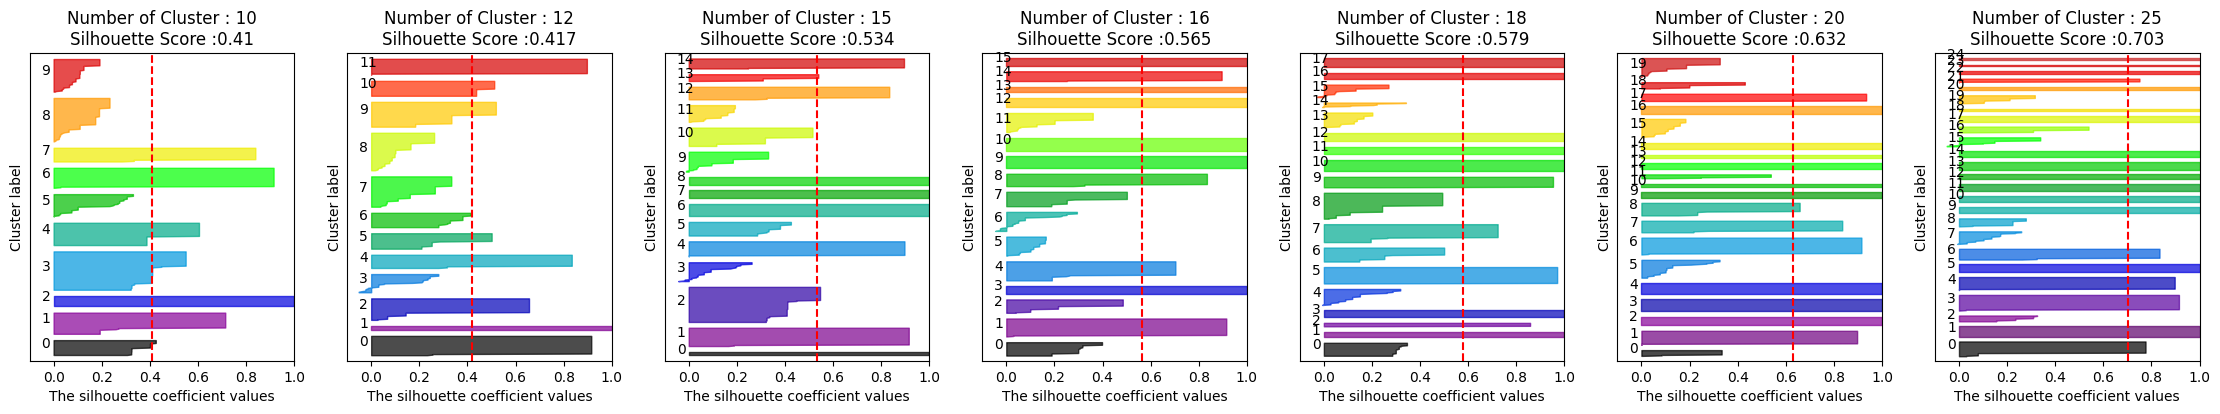

In [27]:
visualize_silhouette([10,12,15,16,18,20,25], X_mmsc_cl)
# 25Í∞úÍ∞Ä ÎêêÏùÑ Îïå Ïã§Î£®Ïó£ Í≥ÑÏàòÍ∞Ä 0.703ÏúºÎ°ú ÏµúÎåÄ

In [33]:
clst_kmeans = KMeans(n_clusters=25, random_state=100, max_iter=500)

model = clst_kmeans.fit(X_mmsc_cl)
clst_label = model.labels_

print(clst_label)

[ 6  6  7 19  6  6  6  6  6 19  6  6  6  6  6  6  6  6  6  6  6  6 19  6
  7  6  6  6  6  6  7  7  7  7  1  1 11  7 11 11  1  1  1 11  1  1  1 11
 11  1  1  1  7  1  1  1  1  1 11  1 11  1  1 11  1 11 11 11  1 11 11  1
  1 11  1 11  0 14 14 14  0  0  0  9  9 18  9  9  0  0  9 18  0  9  0  0
  0 18  0  0  0  0  9  0  0  9 14 14 18 14  9  0  9  0 18  0  0  0  9 14
 14 14  9  0  0 14 14  9  0 14  0  0  0 14  0  0  0 18  0  9  0  0  0  9
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  7  4  4  4  4  4  4  4  4  4
  4  4  7 22  4  4  4 22  4  4  4 22  4  4  4 22  7  7  7 22  4 22  4 22
  4  4  4  4 22  4  4  4  4 10 10 10 16 16 16 16 10 10 10 16 10 10 16 10
 10 10 10 16 16 10 16 16 10 16 10 16 16 16  8  8  8 20  8  8 20 20  8  8
  8 20  8  8 20  8  8 20  8 20  8  8  8 20  8  8  8  5  5  5 21  5  5  7
  5  5  5 21  5 21 21  5 21  5  7  7  7  5 21 21  5  5 21 21  5  5  5  5
 17 24 17 17 24 17 24 17 17 17 17 17 17 24  7 17 24 17 17 17 24  7  7 15
 19 15 19 19  7 15 15 15 19 19 15 15 15 19 15 15 15

In [34]:
df_kmeans["NumberOfCluster"] = pd.Series(clst_label)
# df_kmeans.tail()

In [35]:
# Ïû¨Î¨¥ Ï†ïÎ≥¥Í∞Ä Ìè¨Ìï®Îèº ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏóê ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÎÑòÎ≤Ñ ÏÇΩÏûÖ
df_join_clst = pd.merge(df_new, df_kmeans[["inst_id", "NumberOfCluster"]], how="inner", on="inst_id")
# df_join_clst.info()

In [38]:
df_join_clst.shape[0] - df_join_clst.count()

inst_id              0
OC                 127
dif_date             1
bedCount            13
revenue1            10
                  ... 
sido_Ï†ÑÎùºÎ∂ÅÎèÑ            0
sido_Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ         0
sido_Ï∂©Ï≤≠ÎÇ®ÎèÑ            0
sido_Ï∂©Ï≤≠Î∂ÅÎèÑ            0
NumberOfCluster      0
Length: 83, dtype: int64

In [ ]:
# Íµ∞ÏßëÎ≥Ñ ÌûàÏä§ÌÜ†Í∑∏Îû® ÌôïÏù∏

def sp_hist(DF=None, colClst=None, colhist=None, Range=None) :
    """
    Íµ∞ÏßëÎ≥Ñ ÌäπÏ†ï Ïª¨ÎüºÏùò ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.

    DF : ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ ÌôïÏù∏ÌïòÍ≥†Ïûê ÌïòÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    colClst : Íµ∞Ïßë Î≤àÌò∏Î•º ÌëúÏãúÌïòÎäî Ïª¨Îüº
    colhist : ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú ÌëúÌòÑÌïòÍ≥†Ïûê ÌïòÎäî Ïª¨Îüº
    """
    
    fig, axs = plt.subplots(figsize=(16, 32), nrows=4, ncols=3)
    # axsÎäî numpy ndarray ÌòïÏãù

    # ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï Î∞è Íπ®Ïßê Î∞©ÏßÄ
    plt.rcParams['font.family'] = 'Malgun Gothic'
    matplotlib.rcParams['axes.unicode_minus'] = False
    
    for c in range(Range):
        dataframe = DF[DF[colClst]==c][colhist]
        # print("ÌòÑÏû¨ ÏàúÏÑú :",c)
        # print("Ìñâ :", c//3)
        # print("Ïó¥ :", c%3)
        axs[(c//3),(c % 3)].hist(dataframe, bins=20)
        axs[(c//3),(c % 3)].set_title('Number of Cluster : '+ str(c)+'\n' \
                            'Column Name :' + str(dataframe.name) )
        axs[(c//3),(c % 3)].set_xlabel("Í≥ÑÍ∏â")
        axs[(c//3),(c % 3)].set_ylabel("ÎèÑÏàò")

    plt.show()

    return

In [ ]:
# Íµ∞ÏßëÎ≥Ñ boxplot ÌôïÏù∏
def sp_boxplot(DF=None, colClst=None, colbox=None, Range=None) :
    plt.figure(figsize=(28,20))
    plt.rcParams['font.family'] = 'Malgun Gothic'
    matplotlib.rcParams['axes.unicode_minus'] = False

    # rectangular box plot
    DF_box = pd.DataFrame()

    for c in range(Range) : 
        dataframe = DF[DF[colClst]==c][colbox]
        dataframe.rename(str(c), inplace=True)
        DF_box = pd.concat([DF_box, dataframe], axis=1)

    sns.boxplot(
                data = DF_box,
                orient='v'
                ) 
    plt.title("ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≥Ñ boxplot")

    plt.show()
    return

In [ ]:
# sp_boxplot(DF=df_join_clst, colClst="NumberOfCluster", colbox="surplus1", Range=25)

In [36]:
# Íµ∞ÏßëÎ≥Ñ Ï§ëÏïôÍ∞íÏúºÎ°ú Í≤∞Ï∏°Ïπò Ï±ÑÏõÄ

def fill_median(DF=None, colClst=None, colFill=None, numclst=None) :
    """
    Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ Îç∞Ïù¥ÌÑ∞Ïóê, Íµ∞ÏßëÎ≥Ñ Ï§ëÏïôÍ∞íÏùÑ Ï±ÑÏõå ÎÑ£Í≥†Ïûê Ìï®

    DF : ÌûàÏä§ÌÜ†Í∑∏Îû®ÏùÑ ÌôïÏù∏ÌïòÍ≥†Ïûê ÌïòÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    colClst : Íµ∞Ïßë Î≤àÌò∏Î•º ÌëúÏãúÌïòÎäî Ïª¨Îüº(str)
    colFill : Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö∞Í≥†Ïûê ÌïòÎäî Ïª¨Îüº Î¶¨Ïä§Ìä∏(list)
    numclst : ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò(int)
    """
    for cl in range(numclst) :
        for L in colFill :
            median_value = DF.loc[DF[colClst] == cl, L].median()
            DF.loc[(DF[colClst] == cl) & DF[L].isnull(), L] = median_value

    return DF

In [37]:
df_join_clst = fill_median(DF=df_join_clst, colClst="NumberOfCluster", 
                           colFill=df_join_clst.columns[2:82], numclst=25)

df_join_clst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   inst_id                        428 non-null    int64  
 1   OC                             301 non-null    float64
 2   dif_date                       428 non-null    float64
 3   bedCount                       428 non-null    float64
 4   revenue1                       428 non-null    float64
 5   salescost1                     428 non-null    float64
 6   sga1                           428 non-null    float64
 7   salary1                        428 non-null    float64
 8   noi1                           428 non-null    float64
 9   noe1                           428 non-null    float64
 10  interest1                      428 non-null    float64
 11  ctax1                          428 non-null    float64
 12  profit1                        428 non-null    flo

In [38]:
df_join_clst = arrange_tt(df_join_clst, df_t, "inst_id")
df_join_clst.iloc[301:310,:]

inst_id  OC  dif_date  bedCount        revenue1      salescost1  \
37         2 NaN  6977.000   300.000 66824864410.000           0.000   
124        5 NaN   663.000    44.000 34957575568.000           0.000   
58         6 NaN 10476.000   276.000 23260305967.000  2542570943.000   
41         8 NaN  2866.000   363.000           0.000           0.000   
74        10 NaN  4959.000   213.000 50370249897.000           0.000   
18        12 NaN  3295.000   220.000 43816543122.000 10051312608.000   
19        13 NaN  5712.000   370.000 86227731973.000 21961377249.000   
75        20 NaN  4009.000   246.000 35709731765.000  4188686629.000   
104       21 NaN   754.000   148.000  2719142464.000           0.000   

               sga1         salary1           noi1           noe1  ...  \
37  65657092101.000 32236953402.000 4314093449.000 4901516562.000  ...   
124 32592697196.000 16722544253.000   68710235.000 1981032861.000  ...   
58  23087485220.000 11687337552.000 1601942757.000 1380941439.000  ...   
41            0.000           0.000 4850652289.000 2060988817.000  ...   
74  48558027276.000 22963463015.000 1534452040.000          0.000  ...   
18  29264928639.000 19715446217.000 3260366823.000 4892588017.000  ...   
19  61519717053.000 39714189795.000  557312990.000 1248942580.000  ...   
75  30001785786.000 18255735890.000  372357781.000  677858348.000  ...   
104  2067186286.000   900922930.000  177541556.000  116742065.000  ...   

     sido_ÏÑúÏö∏ÌäπÎ≥ÑÏãú  sido_ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú  sido_Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú  sido_Ïù∏Ï≤úÍ¥ëÏó≠Ïãú  sido_Ï†ÑÎùºÎÇ®ÎèÑ  sido_Ï†ÑÎùºÎ∂ÅÎèÑ  \
37            0             0           0           1          0          0   
124           0             0           0           0          0          0   
58            0             0           0           0          1          0   
41            0             0           0           0          0          0   
74            0             0           0           0          0          1   
18            0             0           0           0          0          0   
19            0             0           0           0          0          0   
75            0             0           0           0          0          1   
104           0             0           0           0          0          0   

     sido_Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  sido_Ï∂©Ï≤≠ÎÇ®ÎèÑ  sido_Ï∂©Ï≤≠Î∂ÅÎèÑ  NumberOfCluster  
37              0          0          0                2  
124             1          0          0               19  
58              0          0          0               16  
41              0          0          0                7  
74              0          0          0                7  
18              0          0          0               14  
19              0          0          0               14  
75              0          0          0                7  
104             0          0          0                3  

[9 rows x 83 columns]

In [39]:
# Ïù∏Îç±Ïä§ Î≤àÌò∏ Ïû¨ÏÑ§Ï†ï
df_join_clst.reset_index(level=0,drop=True,inplace=True)
df_join_clst.iloc[301:310,:]

inst_id  OC  dif_date  bedCount        revenue1      salescost1  \
301        2 NaN  6977.000   300.000 66824864410.000           0.000   
302        5 NaN   663.000    44.000 34957575568.000           0.000   
303        6 NaN 10476.000   276.000 23260305967.000  2542570943.000   
304        8 NaN  2866.000   363.000           0.000           0.000   
305       10 NaN  4959.000   213.000 50370249897.000           0.000   
306       12 NaN  3295.000   220.000 43816543122.000 10051312608.000   
307       13 NaN  5712.000   370.000 86227731973.000 21961377249.000   
308       20 NaN  4009.000   246.000 35709731765.000  4188686629.000   
309       21 NaN   754.000   148.000  2719142464.000           0.000   

               sga1         salary1           noi1           noe1  ...  \
301 65657092101.000 32236953402.000 4314093449.000 4901516562.000  ...   
302 32592697196.000 16722544253.000   68710235.000 1981032861.000  ...   
303 23087485220.000 11687337552.000 1601942757.000 1380941439.000  ...   
304           0.000           0.000 4850652289.000 2060988817.000  ...   
305 48558027276.000 22963463015.000 1534452040.000          0.000  ...   
306 29264928639.000 19715446217.000 3260366823.000 4892588017.000  ...   
307 61519717053.000 39714189795.000  557312990.000 1248942580.000  ...   
308 30001785786.000 18255735890.000  372357781.000  677858348.000  ...   
309  2067186286.000   900922930.000  177541556.000  116742065.000  ...   

     sido_ÏÑúÏö∏ÌäπÎ≥ÑÏãú  sido_ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú  sido_Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú  sido_Ïù∏Ï≤úÍ¥ëÏó≠Ïãú  sido_Ï†ÑÎùºÎÇ®ÎèÑ  sido_Ï†ÑÎùºÎ∂ÅÎèÑ  \
301           0             0           0           1          0          0   
302           0             0           0           0          0          0   
303           0             0           0           0          1          0   
304           0             0           0           0          0          0   
305           0             0           0           0          0          1   
306           0             0           0           0          0          0   
307           0             0           0           0          0          0   
308           0             0           0           0          0          1   
309           0             0           0           0          0          0   

     sido_Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  sido_Ï∂©Ï≤≠ÎÇ®ÎèÑ  sido_Ï∂©Ï≤≠Î∂ÅÎèÑ  NumberOfCluster  
301             0          0          0                2  
302             1          0          0               19  
303             0          0          0               16  
304             0          0          0                7  
305             0          0          0                7  
306             0          0          0               14  
307             0          0          0               14  
308             0          0          0                7  
309             0          0          0                3  

[9 rows x 83 columns]

### Î™®Îç∏ ÌïôÏäµ

In [40]:
scaler3 = MinMaxScaler()

scaler3.fit(df_join_clst.iloc[:,2:82])

X3 = scaler3.transform(df_join_clst.iloc[:,2:82])

X3.shape

(428, 80)

In [41]:
train_X3 = X3[:301]
test_X3 = X3[301:]
train_y3 = df_join_clst.iloc[:301,1]
test_y3 = df_join_clst.iloc[301:,1]

print("Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ train ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", train_X3.shape)
print("Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ test ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", test_X3.shape)
print("Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ train Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", train_y3.shape)
print("Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ test Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", test_y3.shape)

Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ train ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (301, 80)
Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ test ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (127, 80)
Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ train Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (301,)
Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ test Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (127,)


In [69]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(train_X3, train_y3, test_size=0.2,random_state=50, stratify=train_y3)


model_xgb_3 = XGBClassifier()
xgb_model_3 = model_xgb_3.fit(X_train3, y_train3)

y_pred_3 = xgb_model_3.predict(X_test3)
print("Ï†ïÌôïÎèÑ : ",round(accuracy_score(y_test3, y_pred_3),3))
print("f1 socre : ",round(f1_score(y_test3, y_pred_3),3))

Ï†ïÌôïÎèÑ :  0.951
f1 socre :  0.975


Ï†ïÌôïÎèÑ :  0.951  
f1 socre :  0.975

In [ ]:
y_pred_train = xgb_model_3.predict(X_train3)
print("Ï†ïÌôïÎèÑ : ",round(accuracy_score(y_train3, y_pred_train),3))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
rf_model = model_rf.fit(X_train3, y_train3)

y_pred_rf = rf_model.predict(X_test3)
print("Ï†ïÌôïÎèÑ : ",round(accuracy_score(y_test3, y_pred_rf),3))
print("f1 socre : ",round(f1_score(y_test3, y_pred_rf),3))

## Î∂ÑÏÑù 4 : ÏùºÎ∂Ä Ïª¨ÎüºÏùÑ Ï∂îÏ∂úÌï¥ Ï∞®Ïõê Ï∂ïÏÜå ÌõÑ Î™®Îç∏ ÌïôÏäµ

Îç∞Ïù¥ÌÑ∞Ïùò ÏñëÏùÄ ÎèÖÎ¶ΩÎ≥ÄÏàò ÏàòÏùò 3Î∞∞ Ïù¥ÏÉÅÏùÄ ÎèºÏïº Ìï®.
ÎèÖÎ¶ΩÎ≥ÄÏàòÎ°ú ÏûëÏö©ÌïòÎäî Ïª¨Îüº ÏàòÍ∞Ä 80Í∞úÏù¥ÎØÄÎ°ú Îã§Ï§ë Í≥µÏÑ†ÏÑ±Í≥º Í≥ºÏ†ÅÌï©, Ï∞®ÏõêÏùò Ï†ÄÏ£ºÏùò ÏòÅÌñ•Ïù¥ ÏòàÏÉÅÎêòÎØÄÎ°ú
Ï∞®Ïõê Ï∂ïÏÜå ÌïÑÏöî  
  
Ïó¨Îü¨ ÌäπÏÑ±Îì§Î°ú Íµ¨ÏÑ±Îêú Îã§Ï∞®ÏõêÏùò Îç∞Ïù¥ÌÑ∞ ÏÖãÏùò Ï∞®ÏõêÏùÑ Ï∂ïÏÜåÌï¥ ÏÉàÎ°úÏö¥ Ï∞®ÏõêÏùò Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º ÏÉùÏÑ±  

![EVAÎÖºÎ¨∏ ÏùºÎ∂Ä1](../data/EVAÎÖºÎ¨∏1_1.png)  
![EVAÎÖºÎ¨∏ ÏùºÎ∂Ä2](../data/EVAÎÖºÎ¨∏1_2.png)  

Ïù¥ÏùµÏûâÏó¨Í∏àÏùÄ Í∏∞ÏóÖÏùò Í≤ΩÏÉÅÏ†ÅÏù∏ ÏòÅÏóÖÌôúÎèô, Í≥†Ï†ïÏûêÏÇ∞Ïùò Ï≤òÎ∂Ñ, Í∑∏ Î∞ñÏùò ÏûêÏÇ∞Ïùò Ï≤òÎ∂Ñ Î∞è Í∏∞ÌÉÄ ÏûÑÏãúÏ†ÅÏù∏ ÏÜêÏùµÍ±∞ÎûòÏóêÏÑú ÏÉùÍ∏¥ Í≤∞Í≥ºÎ°úÏÑú Ï£ºÏ£ºÏóêÍ≤å Î∞∞ÎãπÍ∏àÏúºÎ°ú ÏßÄÍ∏âÌïòÍ±∞ÎÇò ÏûêÎ≥∏ÏúºÎ°ú ÎåÄÏ≤¥ÎêòÏßÄ ÏïäÍ≥† ÎÇ®ÏïÑÏûàÎäî Î∂ÄÎ∂ÑÏùÑ ÎßêÌïúÎã§. Ïù¥ÏùµÏûâÏó¨Í∏àÏùÄ Í∏∞ÏóÖÏùò Í≤ΩÏòÅÌôúÎèôÏóê ÏùòÌïú ÏÜêÏùµÍ±∞ÎûòÏóê ÏùòÌïòÏó¨ Î∞úÏÉùÌïòÎäî Ïù¥ÏùµÏùÑ ÏõêÏ≤úÏúºÎ°ú ÌïòÎäî ÏûâÏó¨Í∏àÏùÑ ÏùòÎØ∏ÌïúÎã§. Ïù¥ÏùµÏûâÏó¨Í∏àÏùÄ Ïù¥ÏùµÏ§ÄÎπÑÍ∏à, Í∏∞ÌÉÄ Î≤ïÏ†ïÏ†ÅÎ¶ΩÍ∏à, ÏûÑÏùòÏ†ÅÎ¶ΩÍ∏à, ÎãπÍ∏∞Îßê ÎØ∏Ï≤òÎ∂ÑÏù¥ÏùµÏûâÏó¨Í∏à ÎòêÎäî ÎãπÍ∏∞Îßê ÎØ∏Ï≤òÎ¶¨Í≤∞ÏÜêÍ∏àÏùò 4Í∞ÄÏßÄÎ°ú ÌÅ¨Í≤å Íµ¨Î∂ÑÎêúÎã§. Ï¥ùÏûêÏÇ∞ÏóêÏÑú Î∂ÄÏ±ÑÏôÄ ÏûêÎ≥∏Í∏àÏùÑ Í≥µÏ†úÌïú ÏûîÏï°ÏùÑ ÏûâÏó¨Í∏àÏù¥Îùº ÌïòÎäîÎç∞, Ïù¥ÏùµÏûâÏó¨Í∏àÏùÄ Ïù¥ÏùµÏ†ÅÎ¶ΩÍ∏à„ÜçÏûÑÏùòÏ†ÅÎ¶ΩÍ∏à(ÏûêÏÇ∞Ïû¨ÌèâÍ∞ÄÏ†ÅÎ¶ΩÍ∏à Ï†úÏô∏) ÎòêÎäî ÎãπÍ∏∞Îßê ÎØ∏Ï≤òÎ∂ÑÏù¥ÏùµÏûâÏó¨Í∏àÍ≥º Í∞ôÏù¥ ÏòÅÏóÖÍ±∞ÎûòÏóêÏÑú Î∞úÏÉùÌïòÎäî Ïù¥ÏùµÏùò Ïú†Î≥¥Î•º ÎßêÌïòÎäî Í≤ÉÏúºÎ°ú ÏûêÎ≥∏Í±∞ÎûòÏóêÏÑú ÎÇòÌÉÄÎÇòÎäî(Ï£ºÏãùÏùò Î∞úÌñâÏ∞®Í∏à„ÜçÍ∞êÏûêÏ∞®Ïùµ„ÜçÌï©Î≥ëÏ∞®Ïùµ) ÏûêÎ≥∏ÏûâÏó¨Í∏àÍ≥ºÎäî Îã§Î•¥Îã§.  
Ï∂úÏ≤ò : https://txsi.hometax.go.kr/docs/customer/dictionary/view.jsp?word=&word_id=7243  

ÏûêÍ∏∞ÏûêÎ≥∏(Owners' Equity, Owner's Capital)
Í∏∞ÏóÖÏùò Ï¥ùÏûêÎ≥∏ÏóêÏÑú Ï∞®ÏûÖÏûêÎ≥∏Í∏à(Î∂ÄÏ±Ñ)Î•º Î∫Ä Í∏àÏï°ÏúºÎ°ú, ÎØ∏Îûò ÏùºÏ†ï ÏãúÏ†êÏóê ÏÉÅÌôòÌï¥Ïïº Ìï† ÏùòÎ¨¥Í∞Ä ÏóÜÎäî Í∏∞ÏóÖ Í≥†Ïú†Ïùò Ïû¨ÏÇ∞Ïù¥Îã§. ÏÜåÏú†Ï£ºÏóêÍ≤å Í∑ÄÏÜçÎêòÏñ¥Ïïº Ìï† Î™´ÏùÑ ÎÇòÌÉÄÎÇ¥Í∏∞ ÎïåÎ¨∏Ïóê ÏÜåÏú†Ï£ºÏßÄÎ∂Ñ ÎòêÎäî Ï£ºÏ£ºÏßÄÎ∂ÑÏù¥ÎùºÍ≥†ÎèÑ Î∂àÎ¶∞Îã§. ÌöåÏÇ¨Ïùò ÏÑ§Î¶Ω Îïå ÎÇ©ÏûÖÎêú ÏûêÎ≥∏Í≥º ÏòÅÏóÖÌôúÎèôÏùÑ ÌïòÎ©¥ÏÑú Î≤åÏñ¥Îì§Ïù∏ Ïù¥Ïùµ Îì±ÏúºÎ°ú Íµ¨ÏÑ±ÎêúÎã§. ÏûêÍ∏∞ÏûêÎ≥∏ÏùÄ Íµ¨Ï≤¥Ï†Å Íµ¨ÏÑ±Ìï≠Î™©ÏùÄ ÏûêÎ≥∏Í∏à„ÜçÏûêÎ≥∏ÏûâÏó¨Í∏à„ÜçÏ£ºÏãùÎ∞úÌñâÏ¥àÍ≥ºÍ∏à„ÜçÍ∏∞ÌÉÄÌè¨Í¥ÑÏÜêÏùµÎàÑÍ≥ÑÏï°„ÜçÏù¥ÏùµÏûâÏó¨Í∏àÏù¥Î©∞, Ïó¨Í∏∞ÏÑúÏùò ÏûêÎ≥∏Í∏àÏùÄ Ï£ºÏ£ºÎì§Ïù¥ ÌòÑÍ∏àÏù¥ÎÇò Í∏∞ÌÉÄÏûêÏÇ∞ÏúºÎ°ú ÏßÅÏ†ë Ìà¨ÏûêÌïú ÏûêÎ≥∏ Ï§ë Ï£ºÏãùÏùò Ïï°Î©¥Í∞ÄÏï°Ïóê Ìï¥ÎãπÎêòÎäî Í∏àÏï°ÏùÑ ÏùòÎØ∏ÌïòÎ©∞ ÎÇ©ÏûÖÏûêÎ≥∏(contributed capital)Ïù¥Îùº Î∂àÎ¶¨Í∏∞ÎèÑ ÌïúÎã§.  
Ï∂úÏ≤ò : https://www.moef.go.kr/sisa/dictionary/detail?idx=2098  

EVAÎäî Í∏∞ÏóÖÏùò Í≥†Ïú†Ìïú ÏòÅÏóÖÌò∏ÎùºÎèôÏùÑ ÌÜµÌï¥ Ï∞ΩÏ∂úÎêú ÏàúÍ∞ÄÏπòÏùò Ï¶ùÍ∞ÄÎ∂ÑÏúºÎ°ú, ÏÑ∏ÌõÑ ÏòÅÏóÖÏù¥ÏùµÏóêÏÑú Ìà¨Ìïò ÏûêÎ≥∏Ïóê ÎåÄÌïú ÏûêÎ≥∏ ÎπÑÏö©Ïù¥ Í≥µÏ†úÎêú ÏûîÏó¨Ïù¥Ïùµ
EVA = ÏÑ∏ÌõÑÏàúÏòÅÏóÖÏù¥Ïùµ - ÏûêÎ≥∏ÎπÑÏö©  
    = (ÏòÅÏóÖÍ¥ÄÎ†® Í≤ΩÏÉÅÏù¥Ïùµ-Î≤ïÏù∏ÏÑ∏) - (ÌÉÄÏù∏ÏûêÎ≥∏ÎπÑÏö©+ÏûêÍ∏∞ÏûêÎ≥∏ÎπÑÏö©)

In [45]:
df_join_clst2 = copy.deepcopy(df_join_clst)

In [46]:
# ÏòÅÏóÖÏù¥Ïùµ Ïª¨Îüº Ï∂îÍ∞Ä(Îß§Ï∂úÏï° - Îß§Ï∂úÏõêÍ∞Ä - ÌåêÎß§ Í¥ÄÎ¶¨ÎπÑ - Í∏âÏó¨)
# revenue - salescost - sga - salary

for i in range(2) : 
    df_join_clst.insert(loc=(24*(i)+11), column="busiProfit"+str(i+1), value=(df_join_clst["revenue"+str(i+1)]-df_join_clst["salescost"+str(i+1)]-df_join_clst["sga"+str(i+1)]-df_join_clst["salary"+str(i+1)]))

df_join_clst.head()

inst_id    OC  dif_date  bedCount        revenue1     salescost1  \
0          1 1.000  3657.000   175.000  4217530010.000          0.000   
30         3 1.000  7580.000   410.000 40242015172.000 3446325396.000   
76         4 1.000   369.000   468.000  1004521989.000  515483669.000   
144        7 1.000  6349.000   353.000 72507342181.000          0.000   
31         9 1.000  4505.000   196.000 49043538016.000          0.000   

               sga1         salary1          noi1           noe1  ...  \
0    3961134739.000  2033835290.000  15652441.000   15236236.000  ...   
30  34084094260.500 19948727243.000 638777298.000 1047972124.000  ...   
76    447219722.000   296402310.000     76156.000      30000.000  ...   
144 70677397660.000 31786048663.000 506223059.000 1259567512.000  ...   
31  47656051197.000 24460782270.000 112352259.000 1419089382.000  ...   

     sido_ÏÑúÏö∏ÌäπÎ≥ÑÏãú  sido_ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú  sido_Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú  sido_Ïù∏Ï≤úÍ¥ëÏó≠Ïãú  sido_Ï†ÑÎùºÎÇ®ÎèÑ  sido_Ï†ÑÎùºÎ∂ÅÎèÑ  \
0             0             0           0           0          0          0   
30            0             0           0           0          0          0   
76            0             0           0           0          0          0   
144           0             0           0           1          0          0   
31            0             0           0           0          0          0   

     sido_Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ  sido_Ï∂©Ï≤≠ÎÇ®ÎèÑ  sido_Ï∂©Ï≤≠Î∂ÅÎèÑ  NumberOfCluster  
0               0          1          0                6  
30              0          0          0                7  
76              0          0          0                0  
144             0          0          0                2  
31              0          0          0                7  

[5 rows x 85 columns]

In [ ]:
# # Î≥ëÏõê Ï¢ÖÎ•ò Î≥Ñ Î≥ëÏÉÅ ÏàòÏùò Ï∞®Ïù¥
# df_bed = df_merge.groupby("instkind",axis=0)["bedCount"].count()
# df_bed

In [ ]:
# Î≥ëÏõêÏùò Î≥ëÏÉÅ ÏàòÍ∞Ä ÎßéÏúºÎ©¥ Í∑∏ÎßåÌÅº ÌôòÏûê ÏàòÏö© ÏàòÍ∞Ä ÎßéÏúºÎãà Î≥ëÏõê ÏÑúÎπÑÏä§Í∞Ä Îçî Ï¢ãÏïÑÏßÄÎäî Í≤ÉÏù¥ ÏïÑÎãêÍπå?

# plt.rcParams['font.family'] = 'Malgun Gothic'
# matplotlib.rcParams['axes.unicode_minus'] = False
# plt.figure(figsize=(12,8))
    
# plt.bar(x=df_bed.index, height=df_bed, color="#009933")
# plt.title("Î≥ëÏõê Ï¢ÖÎ•òÎ≥Ñ Î≥ëÏÉÅ Ïàò")
# plt.xlabel("Î≥ëÏõê Ï¢ÖÎ•ò")
# plt.ylabel("Î≥ëÏÉÅ Í∞ØÏàò")
# plt.show()

In [47]:
df_red = df_join_clst[["inst_id","OC", "dif_date","bedCount","busiProfit1", "busiProfit2", "profit1", "surplus1", "profit2", "surplus2", 'receivableS1', 'receivableS2',
                  "employee1", "employee2"]]

df_red.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 0 to 94
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   inst_id       428 non-null    int64  
 1   OC            301 non-null    float64
 2   dif_date      428 non-null    float64
 3   bedCount      428 non-null    float64
 4   busiProfit1   428 non-null    float64
 5   busiProfit2   428 non-null    float64
 6   profit1       428 non-null    float64
 7   surplus1      428 non-null    float64
 8   profit2       428 non-null    float64
 9   surplus2      428 non-null    float64
 10  receivableS1  428 non-null    float64
 11  receivableS2  428 non-null    float64
 12  employee1     428 non-null    float64
 13  employee2     428 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 50.2 KB


In [ ]:
df_red.describe()

In [48]:
df_red["employee_mean"] = (df_red["employee1"] + df_red["employee2"])/2
df_red[["employee1", "employee2", "employee_mean"]]

employee1  employee2  employee_mean
0       62.000     64.000         63.000
30     801.000    813.000        807.000
76     234.000      1.000        117.500
144    663.000    663.000        663.000
31     206.000    197.000        201.500
..         ...        ...            ...
65     560.000    103.500        331.750
35     132.000    137.000        134.500
36      94.500     93.000         93.750
126    363.000    343.000        353.000
94      51.000     54.000         52.500

[428 rows x 3 columns]

In [49]:
df_red.drop(["employee1", "employee2"],axis=1,inplace=True)
df_red.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 0 to 94
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   inst_id        428 non-null    int64  
 1   OC             301 non-null    float64
 2   dif_date       428 non-null    float64
 3   bedCount       428 non-null    float64
 4   busiProfit1    428 non-null    float64
 5   busiProfit2    428 non-null    float64
 6   profit1        428 non-null    float64
 7   surplus1       428 non-null    float64
 8   profit2        428 non-null    float64
 9   surplus2       428 non-null    float64
 10  receivableS1   428 non-null    float64
 11  receivableS2   428 non-null    float64
 12  employee_mean  428 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 46.8 KB


In [50]:
scaler4 = MinMaxScaler()

scaler4.fit(df_red.iloc[:,2:])

X4 = scaler4.transform(df_red.iloc[:,2:])

X4.shape

(428, 11)

In [51]:
train_X4 = X4[:301]
test_X4 = X4[301:]
train_y4 = df_red.iloc[:301,1]
test_y4 = df_red.iloc[301:,1]

print("Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ train ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", train_X4.shape)
print("Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ test ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", test_X4.shape)
print("Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ train Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", train_y4.shape)
print("Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ test Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", test_y4.shape)

Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ train ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (301, 11)
Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ test ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (127, 11)
Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ train Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (301,)
Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ test Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (127,)


In [68]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(train_X4, train_y4, test_size=0.2,random_state=50, stratify=train_y4)


model_xgb_4 = XGBClassifier()
xgb_model_4 = model_xgb_4.fit(X_train4, y_train4)

y_pred_4 = xgb_model_4.predict(X_test4)
print("Ï†ïÌôïÎèÑ : ",round(accuracy_score(y_test4, y_pred_4),3))
print("f1 socre : ",round(f1_score(y_test4, y_pred_4),3))

Ï†ïÌôïÎèÑ :  0.951
f1 socre :  0.975


Ï†ïÌôïÎèÑ :  0.951  
f1 socre :  0.975

In [ ]:
# ÎèÖÎ¶ΩÎ≥ÄÏàò Ïª¨Îüº ÏÉ§ÌîºÎ°ú ÏúåÌÅ¨ Í≤ÄÏ†ïÏúºÎ°ú Ï†ïÍ∑úÏÑ± ÌôïÏù∏
# H0 : Î≥ÄÏàòÎäî Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§.
# H1 : Î≥ÄÏàòÎäî Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•¥ÏßÄ ÏïäÎäîÎã§.

# cnt = 0
# for i in range(df_model_origin.shape[1]) : 
#     cnt += 1
#     shapiro_tt = stats.shapiro(df_model_origin.iloc[:,i])
#     print(cnt)
#     if shapiro_tt[1] > 0.05 : 
#         print("Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú")
#         print("Ïª¨ÎüºÎ™Ö ",df_model_origin.columns[i],"Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉù, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.")
#     else : 
#         print("Ïú†ÏùòÏàòÏ§Ä 5%ÏóêÏÑú")
#         print("Ïª¨ÎüºÎ™Ö ",df_model_origin.columns[i],"Îäî(ÏùÄ) Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞Å, Ï†ïÍ∑úÏÑ±ÏùÑ Îî∞Î•∏Îã§Í≥† Í∞ÄÏ†ïÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
#     print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-")

## Î∂ÑÏÑù 5 : SVDÎ•º ÏÇ¨Ïö©Ìïú Ï∞®Ïõê Ï∂îÏ∂ú ÌõÑ Î™®Îç∏ ÌïôÏäµ

SVDÎ•º ÌÜµÌï¥, AÎùºÎäî ÏûÑÏùòÏùò ÌñâÎ†¨ÏùÑ Ïó¨Îü¨Í∞úÏùò A ÌñâÎ†¨Í≥º ÎèôÏùºÌïú ÌÅ¨Í∏∞Î•º Í∞ñÎäî Ïó¨Îü¨Í∞úÏùò ÌñâÎ†¨Î°ú Î∂ÑÌï¥Ìï¥ÏÑú ÏÉùÍ∞ÅÌï† Ïàò ÏûàÎäîÎç∞, Î∂ÑÌï¥Îêú Í∞Å ÌñâÎ†¨Ïùò ÏõêÏÜåÏùò Í∞íÏùò ÌÅ¨Í∏∞Îäî œÉÏùò Í∞íÏùò ÌÅ¨Í∏∞Ïóê ÏùòÌï¥ Í≤∞Ï†ïÎêúÎã§.  
Îã§Ïãú ÎßêÌï¥, SVDÎ•º Ïù¥Ïö©Ìï¥ ÏûÑÏùòÏùò ÌñâÎ†¨ AÎ•º Ï†ïÎ≥¥ÎüâÏóê Îî∞Îùº Ïó¨Îü¨ layerÎ°ú Ï™ºÍ∞úÏÑú ÏÉùÍ∞ÅÌï† Ïàò ÏûàÍ≤å Ìï¥Ï§ÄÎã§.  
Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Í∞Ä Ïä§ÏºÄÏùºÎßÅÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Ï§ëÏã¨Ïù¥ ÎèôÏùºÌï¥ÏßÄÎ©¥ ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò SVDÏôÄ PCAÎäî ÎèôÏùºÌïú Î≥ÄÌôòÏùÑ ÏàòÌñâÌïòÎ©∞, Ìù¨ÏÜå ÌñâÎ†¨(Sparse Matrix)Ïóê ÎåÄÌïú Î≥ÄÌôòÎèÑ Í∞ÄÎä•

In [42]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

# Ï∞®Ïõê Ï∂ïÏÜåÎ•º ÏúÑÌïú SVD ÏàòÌñâ
svd = TruncatedSVD(n_components=20)
X5 = svd.fit(X3)
X5 = svd.transform(X3)
X5

array([[ 0.86359269, -0.82765858,  0.34181784, ...,  0.04887954,
        -0.02953625,  0.00211185],
       [ 1.33126136,  0.67109299,  0.64663736, ..., -0.08142475,
         0.0515641 , -0.11248426],
       [ 1.82746723, -0.79260908, -1.09945301, ..., -0.01325149,
         0.10025851, -0.13741097],
       ...,
       [ 1.79520175,  0.35658154, -1.2887828 , ...,  0.06045529,
         0.03301935, -0.05990207],
       [ 1.01068686,  0.67783608,  0.78896013, ..., -0.07665558,
        -0.29342909,  0.40164421],
       [ 0.73268674,  0.27164864,  0.15719175, ...,  0.02848072,
        -0.05444345, -0.04817616]])

In [43]:
train_X5 = X5[:301]
test_X5 = X5[301:]
train_y5 = df_join_clst.iloc[:301,1]
test_y5 = df_join_clst.iloc[301:,1]

print("Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ train ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", train_X5.shape)
print("Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ test ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", test_X5.shape)
print("Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ train Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", train_y5.shape)
print("Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ test Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", test_y5.shape)

Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ train ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (301, 20)
Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ test ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (127, 20)
Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ train Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (301,)
Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ test Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (127,)


In [44]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(train_X5, train_y5, test_size=0.2,random_state=50, stratify=train_y5)


model_xgb_5 = XGBClassifier()
xgb_model_5 = model_xgb_5.fit(X_train5, y_train5)

y_pred_5 = xgb_model_5.predict(X_test5)
print("Ï†ïÌôïÎèÑ : ",round(accuracy_score(y_test5, y_pred_5),3))
print("f1 socre : ",round(f1_score(y_test5, y_pred_5),3))

Ï†ïÌôïÎèÑ :  0.951
f1 socre :  0.975


Ï†ïÌôïÎèÑ :  0.951  
f1 socre :  0.975

### KFold + GridSearchCV

In [ ]:
skfold = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

In [ ]:
params = {'n_estimators': [10,50,100,150,200,300,500], 
          'max_depth' : [3,4,5,6,9,10,12,15,20,25],
          'grow_policy' : ['depthwise', 'lossguide'],
          'learning_rate' : np.logspace(start=-3, stop=0, num=4).tolist() + [0.05, 0.03, 0.5, 0.3],
          'gamma' : [0, 0.1, 1, 10],
          'n_jobs' : [-1],
          'reg_lambda' : [1,2,3,4,5,6,7,8,9]}

In [ ]:
import time
import winsound

start_time = time.time()   # ÏãúÏûë ÏãúÍ∞Ñ Ï†ÄÏû•

model_xgb_6 = XGBClassifier()

grid = GridSearchCV(estimator=model_xgb_6, param_grid=params, cv=skfold)

grid.fit(X_train5, y_train5)

end_time = time.time()    # Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å ÏãúÍ∞Ñ Ï†ÄÏû•

print("Î™®Îç∏ ÌïôÏäµ ÏãúÍ∞Ñ : ",round(end_time-start_time, 2)," (sec)")

# ÏïåÎ¶ºÏùå Ïû¨ÏÉù
winsound.Beep(frequency=440, # Hz
                duration=1000  # ms
                )

In [ ]:
best_parameters = grid.best_params_
best_accuracy = grid.best_score_

print("ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞ :", best_parameters)
print("ÏµúÍ≥† Ïä§ÏΩîÏñ¥ :", best_accuracy)

In [ ]:
best_model = grid.best_estimator_

y_pred_6 = best_model.predict(X_test5)
print("Ï†ïÌôïÎèÑ : ",round(accuracy_score(y_test5, y_pred_6),3))
print("f1 socre : ",round(f1_score(y_test5, y_pred_6),3))

In [ ]:
# model Ï†ÄÏû•
joblib.dump(best_model, dirShare+"/model/pred_xgb_output_hospital.pkl")

# scaler Ï†ÄÏû•
joblib.dump(scaler3, dirShare+"/model/pred_xgb_output_hospital_sc_f.pkl")

# svc Ï†ÄÏû•
joblib.dump(svd, dirShare+"/model/pred_xgb_output_hospital_svd.pkl")

In [65]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞

# byteÎ°ú Î∂àÎü¨Ïò§Í∏∞
# withÎ¨∏ÏúºÎ°ú ÌååÏùºÏùÑ open ÌïòÎ©¥ Ïã§ÌñâÏù¥ ÎÅùÎÇòÍ≥† ÏûêÎèôÏúºÎ°ú close
with open(dirShare+"/model/pred_xgb_output_hospital.pkl", "rb") as m : 
    model = joblib.load(m)
    val_pred = model.predict(test_X5)
    
    cnt = 0
    for prd in val_pred : 
        cnt += 1
        print(str(cnt)+"Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ : ", end=" ")
        if prd == 1 :
            print("Í∞úÏóÖ Ïú†ÏßÄ")
        else : 
            print("Î≥ëÏõê ÌèêÏóÖ")

    print("ÏòàÏÉÅ Í∞úÌèêÏóÖ : ", val_pred)


1Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
2Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
3Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
4Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
5Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
6Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
7Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
8Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
9Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
10Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
11Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
12Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
13Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
14Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
15Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
16Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
17Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
18Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
19Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Î≥ëÏõê ÌèêÏóÖ
20Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
21Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
22Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
23Î≤àÏß∏ Î≥ëÏõê Îç∞Ïù¥ÌÑ∞ :  Í∞úÏóÖ Ïú†ÏßÄ
24Î≤àÏß∏ Î≥ëÏõê Îç∞Ï

## Î∂ÑÏÑù 6 : Deep Learning ÏùÑ ÏÇ¨Ïö©Ìïú Î™®Îç∏ ÌïôÏäµ

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from tensorflow.nn import leaky_relu
from keras.regularizers import l2 

In [56]:
print(X_train5.shape[1])

20


In [61]:
def makeDNN() : 
    """
    DNN Î™®Îç∏ÏùÑ ÎßåÎìúÎäî Ìï®Ïàò ÏûÖÎãàÎã§.
    """
    Leaky_relu = leaky_relu
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train5.shape[1],), activation=Leaky_relu,kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2)) # ÎìúÎ°≠ÏïÑÏõÉ Ï∂îÍ∞Ä. ÎπÑÏú®ÏùÄ 20%
    model.add(Dense(128, activation=Leaky_relu,kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2)) # ÎìúÎ°≠ÏïÑÏõÉ Ï∂îÍ∞Ä. ÎπÑÏú®ÏùÄ 20%
    model.add(Dense(64, activation=Leaky_relu,kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2)) # ÎìúÎ°≠ÏïÑÏõÉ Ï∂îÍ∞Ä. ÎπÑÏú®ÏùÄ 20%
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.2)) # ÎìúÎ°≠ÏïÑÏõÉ Ï∂îÍ∞Ä. ÎπÑÏú®ÏùÄ 20%
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=binary_crossentropy, optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])

    return model

In [78]:
X_train_t, X_val, y_train_t, y_val = train_test_split(X_train5, y_train5, random_state=50, test_size=0.2, stratify=y_train5)

print("train ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", X_train_t.shape)
print("validation ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", X_val.shape)
print("train Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", y_train_t.shape)
print("validation Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ : ", y_val.shape)

train ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (192, 20)
validation ÎèÖÎ¶ΩÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (48, 20)
train Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (192,)
validation Ï¢ÖÏÜçÎ≥ÄÏàò ÌÅ¨Í∏∞ :  (48,)


https://www.slideshare.net/w0ong/ss-82372826

In [91]:
model_7 = makeDNN()

hist = model_7.fit(X_train_t, y_train_t,
                     validation_data=(X_val, y_val),
                        epochs=200, batch_size=10)

Epoch 1/200
20/20 [==============================] - 2s 15ms/step - loss: 1.1315 - accuracy: 0.9115 - val_loss: 0.3443 - val_accuracy: 0.9583
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 0.3405 - accuracy: 0.9479 - val_loss: 0.2479 - val_accuracy: 0.9583
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 0.2399 - accuracy: 0.9479 - val_loss: 0.2244 - val_accuracy: 0.9583
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 0.2354 - accuracy: 0.9479 - val_loss: 0.2580 - val_accuracy: 0.9583
Epoch 5/200
20/20 [==============================] - 0s 5ms/step - loss: 0.2441 - accuracy: 0.9479 - val_loss: 0.2242 - val_accuracy: 0.9583
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 0.2650 - accuracy: 0.9479 - val_loss: 0.2300 - val_accuracy: 0.9583
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 0.2831 - accuracy: 0.9479 - val_loss: 0.2465 - val_accuracy: 0.9583
Epoch 8/200


In [92]:
test_loss, test_acc = model_7.evaluate(X_test5, y_test5)

print("Test accuracy:", test_acc)

2/2 [==============================] - 0s 6ms/step - loss: 0.2241 - accuracy: 0.9508
Test accuracy: 0.9508196711540222


In [93]:
y_pred_DNN = model_7.predict(X_test5)


# print("Ï†ïÌôïÎèÑ : ",round(accuracy_score(y_test5, y_pred_DNN),3))
# print("f1 socre : ",round(f1_score(y_test5, y_pred_DNN),3))

2/2 [==============================] - 0s 2ms/step


In [95]:
y_pred_DNN[y_pred_DNN < 0.8]

array([], dtype=float32)

In [88]:
def graph_val_train(model) : 
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(model.history['loss'], 'y', label='train los')
    loss_ax.plot(model.history['val_loss'], 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')

    plt.show()


In [96]:
graph_val_train(hist)

In [97]:
model_8 = makeDNN()

hist2 = model_8.fit(X_train_t, y_train_t,
                     validation_data=(X_val, y_val),
                        epochs=10, batch_size=10)

Epoch 1/10
20/20 [==============================] - 2s 18ms/step - loss: 1.1373 - accuracy: 0.9010 - val_loss: 0.3657 - val_accuracy: 0.9583
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3419 - accuracy: 0.9479 - val_loss: 0.2567 - val_accuracy: 0.9583
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2372 - accuracy: 0.9479 - val_loss: 0.2287 - val_accuracy: 0.9583
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2370 - accuracy: 0.9479 - val_loss: 0.2623 - val_accuracy: 0.9583
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2441 - accuracy: 0.9479 - val_loss: 0.2284 - val_accuracy: 0.9583
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.2929 - accuracy: 0.9479 - val_loss: 0.2795 - val_accuracy: 0.9583
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.3407 - accuracy: 0.9479 - val_loss: 0.2839 - val_accuracy: 0.9583
Epoch 8/10
20/20 [=

In [98]:
test_loss2, test_acc2 = model_8.evaluate(X_test5, y_test5)

print("Test accuracy:", round(test_acc2,3))

2/2 [==============================] - 0s 4ms/step - loss: 0.2248 - accuracy: 0.9508
Test accuracy: 0.951


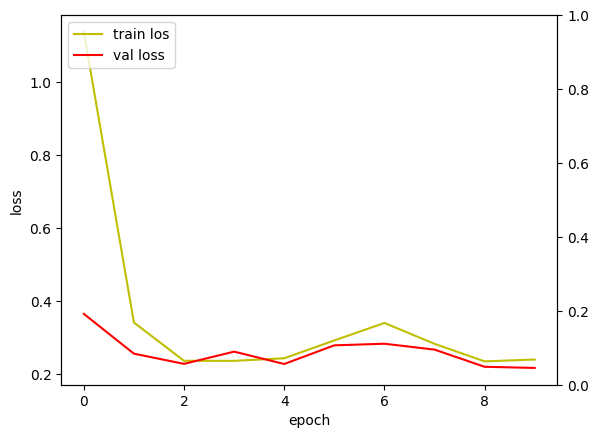

In [99]:
graph_val_train(hist2)

https://3months.tistory.com/321  
https://datahacker.rs/018-pytorch-popular-techniques-to-prevent-the-overfitting-in-a-neural-networks/  

# Î≥ëÏõê Ï†ïÎ≥¥ api Î∂àÎü¨Ïò§Í∏∞

In [ ]:
serviceKey = "repbMvjCXw96iTs6wjKM3Htm1H480VcdawruKmikMmOYZF8aVD/rJDkfGoyLeTuS5Y1KEOzUrwwPIu87UQ9LbQ=="
serviceKeyDecoded = parse.unquote(serviceKey, 'UTF-8')

url = "http://apis.data.go.kr/B551182/hospInfoServicev2/getHospBasisList"
returnType="xml"
Pindex = 1
Psize = 1000


queryParams = '?' + parse.urlencode({ parse.quote_plus("serviceKey") : serviceKeyDecoded,
                                parse.quote_plus("numOfRows") : '10000',
                                parse.quote_plus("pageNo") : '2'
                                    })

res = requests.get(url + queryParams)

In [ ]:
soup = BeautifulSoup(res.text, 'lxml-xml')
items = soup.find_all("item")

In [ ]:
pprint.pprint(items)

In [ ]:
len(items)

In [ ]:
def parse():
    try:
        ADDR = item.find("addr").get_text()
        CLCD = item.find("clCd").get_text()
        CLCDNM = item.find("clCdNm").get_text()
        EMDONGNM = item.find("emdongNm").get_text()
        ESTBDB = item.find("estbDd").get_text()
        POSTNO = item.find("postNo").get_text()
        SGGUCD = item.find("sgguCd").get_text()
        SGGUCDNM = item.find("sgguCdNm").get_text()
        SIDOCD = item.find("sidoCd").get_text()
        SIDOCDNM = item.find("sidoCdNm").get_text()
        XPOS = item.find("XPos").get_text()
        YPOS = item.find("YPos").get_text()
        YADMNM = item.find("yadmNm").get_text()
        YKIHO = item.find("ykiho").get_text()
        return {
            "Ï£ºÏÜå":ADDR,
            "Ï¢ÖÎ≥ÑÏΩîÎìú":CLCD,
            "Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö":CLCDNM,
            "ÏùçÎ©¥Îèô":EMDONGNM,
            "Í∞úÏÑ§ÏùºÏûê":ESTBDB,
            "Post No.":POSTNO,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìú":SGGUCD,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö":SGGUCDNM,
            "ÏãúÎèÑÏΩîÎìú":SIDOCD,
            "ÏãúÎèÑÏΩîÎìúÎ™Ö":SIDOCDNM,
            "xÏ¢åÌëú":XPOS,
            'yÏ¢åÌëú':YPOS,
            "ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö":YADMNM,
            "ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏":YKIHO
        }
    except AttributeError as e:
        return {
            "Ï£ºÏÜå":None,
            "Ï¢ÖÎ≥ÑÏΩîÎìú":None,
            "Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö":None,
            "ÏùçÎ©¥Îèô":None,
            "Í∞úÏÑ§ÏùºÏûê":None,
            "Post No.":None,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìú":None,
            "ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö":None,
            "ÏãúÎèÑÏΩîÎìú":None,
            "ÏãúÎèÑÏΩîÎìúÎ™Ö":None,
            "xÏ¢åÌëú":None,
            'yÏ¢åÌëú':None,
            "ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö":None,
            "ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏":None
        }

In [ ]:
row = list()

for item in items : 
    row.append(parse())

In [ ]:
df_api = pd.DataFrame(row)
df_api.head()

In [ ]:
df_api.shape[0] - df_api.count()

In [ ]:
df_api.dropna(axis=0, how="any", inplace=True)
df_api.shape

In [ ]:
df_api.to_csv(dirShare+"/data/Î≥ëÏõêÏ†ïÎ≥¥api_day2.csv",sep=',', encoding="utf-8")

In [ ]:
# 17ÎÖÑÎèÑ ÎãπÍ∏∞ÏàúÏù¥Ïùµ ÌûàÏä§ÌÜ†Í∑∏Îû®
sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="profit1", Range=12)

In [ ]:
#17ÎÖÑÎèÑ ÎãπÍ∏∞ÏàúÏù¥Ïùµ Î∞ïÏä§ÌîåÎ°Ø
sp_boxplot(DF=df_join_clst, colClst="NumberOfCluster", colbox="profit1", Range=10)

In [ ]:
# test_df[test_df["1"].notnull()]

In [ ]:
# 16ÎÖÑÎèÑ ÎãπÍ∏∞ÏàúÏù¥Ïùµ
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="profit2")

In [ ]:
# 17ÎÖÑÎèÑ Ïù¥Ïùµ ÏûâÏó¨Í∏à
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="surplus1")

In [ ]:
# 16ÎÖÑÎèÑ Ïù¥Ïùµ ÏûâÏó¨Í∏à
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="surplus2")

In [ ]:
# 17ÎÖÑÎèÑ ÏßÅÏõêÏàò
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="employee1")

In [ ]:
# 16ÎÖÑÎèÑ ÏßÅÏõêÏàò
# sp_hist(DF=df_join_clst, colClst="NumberOfCluster", colhist="employee2")